# Overview
Can you predict whether people got H1N1 and seasonal flu vaccines using information they shared about their backgrounds, opinions, and health behaviors?

In this challenge, we will take a look at vaccination, a key public health measure used to fight infectious diseases. Vaccines provide immunization for individuals, and enough immunization in a community can further reduce the spread of diseases through "herd immunity."

As of the launch of this competition, vaccines for the COVID-19 virus are still under development and not yet available. The competition will instead revisit the public health response to a different recent major respiratory disease pandemic. Beginning in spring 2009, a pandemic caused by the H1N1 influenza virus, colloquially named "swine flu," swept across the world. Researchers estimate that in the first year, it was responsible for between 151,000 to 575,000 deaths globally.

A vaccine for the H1N1 flu virus became publicly available in October 2009. In late 2009 and early 2010, the United States conducted the National 2009 H1N1 Flu Survey. This phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. A better understanding of how these characteristics are associated with personal vaccination patterns can provide guidance for future public health efforts.

This is a practice competition designed to be accessible to participants at all levels. That makes it a great place to dive into the world of data science competitions. Come on in from the waiting room and try your (hopefully steady) hand at predicting vaccinations.

# Problem description
Your goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, you'll be predicting two probabilities: one for h1n1_vaccine and one for seasonal_vaccine.

Each row in the dataset represents one person who responded to the National 2009 H1N1 Flu Survey.

# Labels
For this competition, there are two target variables:

h1n1_vaccine - Whether respondent received H1N1 flu vaccine.
seasonal_vaccine - Whether respondent received seasonal flu vaccine.
Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both. This is formulated as a multilabel (and not multiclass) problem.

Labels
For this competition, there are two target variables:

h1n1_vaccine - Whether respondent received H1N1 flu vaccine.

seasonal_vaccine - Whether respondent received seasonal flu vaccine.

Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both. This is formulated as a multilabel (and not multiclass) problem.


The features in this dataset

You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.

For all binary variables: 0 = No; 1 = Yes.

h1n1_concern - Level of concern about the H1N1 flu.

0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

h1n1_knowledge - Level of knowledge about H1N1 flu.

0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

behavioral_antiviral_meds - Has taken antiviral medications. (binary)

behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)

behavioral_face_mask - Has bought a face mask. (binary)

behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)

behavioral_large_gatherings - Has reduced time at large gatherings. (binary)

behavioral_outside_home - Has reduced contact with people outside of own household. (binary)

behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)

doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)

doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)

chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines 
taken for a chronic illness. (binary)

child_under_6_months - Has regular close contact with a child under the age of six months. (binary)

health_worker - Is a healthcare worker. (binary)

health_insurance - Has health insurance. (binary)

opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.

1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.

1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.

1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.

1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.

1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.

1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

age_group - Age group of respondent.

education - Self-reported education level.

race - Race of respondent.

sex - Sex of respondent.

income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.

marital_status - Marital status of respondent.

rent_or_own - Housing situation of respondent.

employment_status - Employment status of respondent.

hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.

census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

household_adults - Number of other adults in household, top-coded to 3.

household_children - Number of children in household, top-coded to 3.

employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.

employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.


# 0. Imports

## 0.0. Libraries

In [892]:
# Jupyter settings
from IPython.core.display      import display, HTML
from IPython.display           import Image

# data manipulation
import numpy as np
import pandas as pd

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# data preparation
from sklearn import preprocessing as pp
from imblearn import combine as c

# feature selection
import boruta as bt

# sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics as m 
from sklearn.metrics import roc_auc_score

# models' cross-validation
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict, RandomizedSearchCV

# models
from sklearn import ensemble as en
from xgboost import XGBClassifier
from catboost import CatBoostClassifier



# metric plot
from scikitplot import metrics as mt

## 0.1. Functions

In [671]:
# jupyter setup
def jupyter_settings():
    
    # jupyter core settings
    display(HTML("<style>.container { width:95% !important; }</style>"))
    
    # pandas
    pd.set_option('display.max_rows', 500)
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.expand_frame_repr', False)
    
    # matplotlib
    !pylab inline
    !matplotlib inline
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [35, 12]
    plt.rcParams['font.size'] = 30
    
    # seaborn
    sns.set()

    
# descriptive analysis summary for numerical features
def num_analysis(num_attributes):
    
    # Cemtral tendency - mean, median
    ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
    ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

    # Dispersion - std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame(num_attributes.apply(np.std)).T
    d2 = pd.DataFrame(num_attributes.apply(min)).T
    d3 = pd.DataFrame(num_attributes.apply(max)).T
    d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

    # concatenate
    m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
    m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis',]
    
    # histogram
    hist = num_attributes.hist()
    
    return m

    return hist

# first try at cross validation, second function using stratified k-fold from sklearn is necessary
def cross_validation(df6, kfold, model, model_name, verbose=False):
    
    # metric score list
    rocauc_score = []
    
    # useful numbers
    fold_size = np.round(df6.shape[0]/kfold, 0)
    a=0
    b=fold_size
        
    # iteration
    for k in reversed(range(1, kfold)):
        if verbose:
            print('KFold Number: {}'.format(k))
        
        # filtering folds with a,b
        validation = df6.loc[(np.round(a, 0)):(np.round(b, 0)), :]
        training = df6[(df6.index < a) | (df6.index > b)]
        
        # training and validation dataset
        # validation
        xvalidation = validation.drop(['h1n1', 'seasonal'], axis=1)
        yvalidation = validation['seasonal']
        
        # training
        xtraining = training.drop(['h1n1', 'seasonal'], axis=1)
        ytraining = training['seasonal']
        
        # model
        model = model.fit(xtraining, ytraining)
        
        # predictions
        y_hat = model.predict(xvalidation)        
        
        # metric result
        results = roc_auc_score(yvalidation, model.predict_proba(xvalidation)[:,1])
        
        # store performance of each iteration
        rocauc_score.append(results)
        
        print(results)
        
        a += fold_size
        b += fold_size
        
    return pd.DataFrame({'Model Name': model_name,
                        'ROC AUC Score': np.round(np.mean(rocauc_score), 2).astype(str) + '+/-' + np.round(np.std(rocauc_score), 2).astype(str)}, index=[0])



In [585]:
jupyter_settings()

/bin/bash: pylab: command not found
/bin/bash: matplotlib: command not found


## 0.2. Data

In [586]:
df_training_features_raw = pd.read_csv('../data/raw/training_set_features.csv')
df_training_labels_raw = pd.read_csv('../data/raw/training_set_labels.csv')
df_testing_features = pd.read_csv('../data/raw/test_set_features.csv')

In [587]:
df_raw = pd.concat([df_training_features_raw, df_training_labels_raw.drop('respondent_id', axis=1)], axis=1)

# 1.0. Data Description

In [588]:
df1 = df_raw.copy()

In [589]:
df1.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


## Columns

In [590]:
df1.columns.tolist()

['respondent_id',
 'h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'household_adults',
 'household_children',
 'employment_industry',
 'employment_occupation',
 'h1n1_vaccine',
 'seasonal_vaccine']

In [591]:
df1.columns = ['respondent_id',
 'h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'household_adults',
 'household_children',
 'employment_industry',
 'employment_occupation',
 'h1n1',
 'seasonal']

## Shape

In [592]:
df1.shape

(26707, 38)

## dtypes

In [593]:
aux = pd.DataFrame(df1.dtypes)
aux

,0
respondent_id,int64
h1n1_concern,float64
h1n1_knowledge,float64
behavioral_antiviral_meds,float64
behavioral_avoidance,float64
behavioral_face_mask,float64
behavioral_wash_hands,float64
behavioral_large_gatherings,float64
behavioral_outside_home,float64
behavioral_touch_face,float64


In [594]:
aux.loc[(aux[0]=='float64') | (aux[0]=='int64')].index

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'h1n1', 'seasonal'],
      dtype='object')

In [595]:
df1['h1n1'] = df1['h1n1'].astype(str)
df1['seasonal'] = df1['seasonal'].astype(str)

## Check NA

In [541]:
df1.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [542]:
(df1.isna().sum() / df1.shape[0])*100 # features with considerable percentage of missing values

# health_insurance               45.957989
# income_poverty                 16.561201
# employment_industry            49.912008  ----> most registers where employment industry is missing happen when employment status is unimoployed
# employment_occupation          50.436215  ----> most registers where employment occupation is missing happen when employment status is unimoployed

respondent_id                   0.000000
h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race            

In [543]:
# aux = df1.drop(['employment_occupation', 'employment_industry', 'health_insurance'], axis=1)

In [544]:
# (aux.isna().sum()/ df1.shape[0])*100

In [545]:
# df1 = df1.drop(['employment_occupation', 'employment_industry', 'health_insurance'], axis=1)
# df1 = df1.dropna()

In [546]:
df1[['age_group', 'education', 'race', 'sex', 'child_under_6_months', 'employment_status', 'employment_occupation', 'employment_industry']].loc[df1['employment_status'].isna()].sample(30)

# nan                ---      nan          ---   nan

# Not in labor force ---      nan          ---   nan

# nan                ---      nan          ---   nan

,age_group,education,race,sex,child_under_6_months,employment_status,employment_occupation,employment_industry
410,18 - 34 Years,NaN,White,Male,NaN,NaN,NaN,NaN
10481,65+ Years,NaN,Black,Female,NaN,NaN,NaN,NaN
18740,55 - 64 Years,NaN,Other or Multiple,Male,NaN,NaN,NaN,NaN
10408,45 - 54 Years,NaN,Hispanic,Female,0.0,NaN,NaN,NaN
984,35 - 44 Years,NaN,White,Male,0.0,NaN,NaN,NaN
20375,35 - 44 Years,NaN,White,Male,NaN,NaN,NaN,NaN
21241,55 - 64 Years,NaN,White,Female,NaN,NaN,NaN,NaN
23029,45 - 54 Years,NaN,White,Male,1.0,NaN,NaN,NaN
18178,18 - 34 Years,NaN,White,Male,0.0,NaN,NaN,NaN
13065,55 - 64 Years,NaN,White,Male,NaN,NaN,NaN,NaN


## Fill NA

## dtypes

## Data Analysis

In [547]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(include=['object'])

### Numerical

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,respondent_id,0.0,26706.0,26706.0,13353.000000,13353.0,7709.646814,0.000000,-1.200000
1,h1n1_concern,0.0,3.0,3.0,1.618486,NaN,0.910294,-0.159913,-0.769691
2,h1n1_knowledge,0.0,2.0,2.0,1.262532,NaN,0.618138,-0.239224,-0.619094
3,behavioral_antiviral_meds,0.0,1.0,1.0,0.048844,NaN,0.215541,4.186503,15.527974
4,behavioral_avoidance,0.0,1.0,1.0,0.725612,NaN,0.446205,-1.011306,-0.977333
5,behavioral_face_mask,0.0,1.0,1.0,0.068982,NaN,0.253424,3.401744,9.572581
6,behavioral_wash_hands,0.0,1.0,1.0,0.825614,NaN,0.379441,-1.716380,0.946031
7,behavioral_large_gatherings,0.0,1.0,1.0,0.358640,NaN,0.479601,0.589522,-1.652588
8,behavioral_outside_home,0.0,1.0,1.0,0.337315,NaN,0.472793,0.688227,-1.526458
9,behavioral_touch_face,0.0,1.0,1.0,0.677264,NaN,0.467523,-0.758355,-1.425005


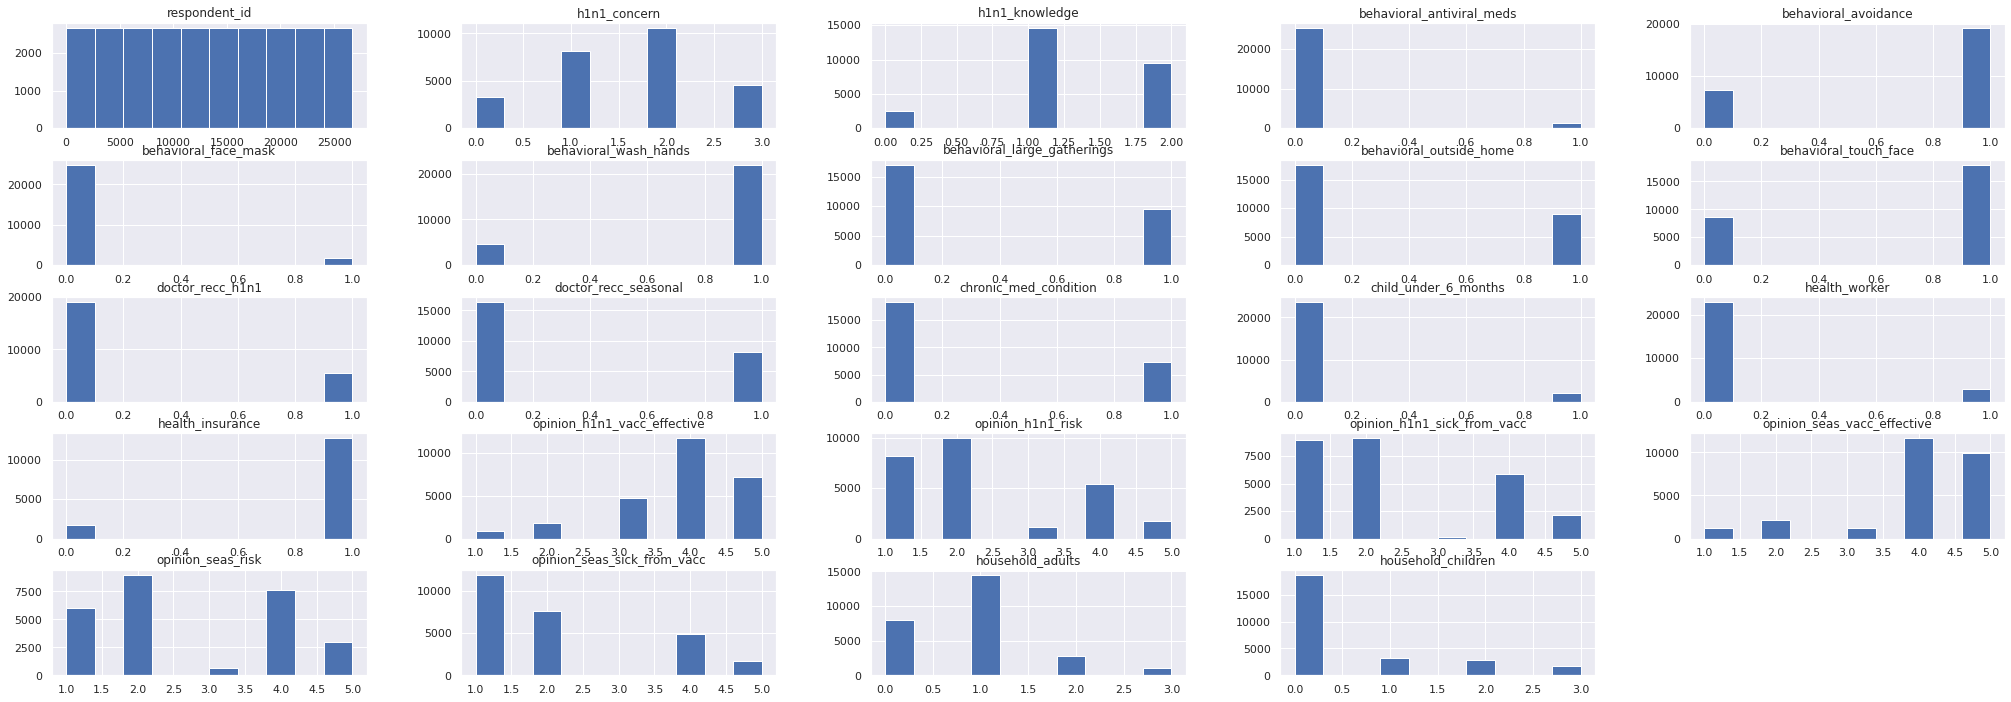

In [21]:
num_analysis(num_attributes)

### Categorical

In [22]:
cat_attributes.head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation,h1n1,seasonal
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN,0,0
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe,0,1
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo,0,0
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN,0,1
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb,0,0


In [23]:
cat_attributes[['employment_status', 'employment_industry', 'employment_occupation']].sample(20)

,employment_status,employment_industry,employment_occupation
10688,Not in Labor Force,NaN,NaN
25012,Employed,mfikgejo,xtkaffoo
10147,Employed,saaquncn,vlluhbov
23999,Unemployed,NaN,NaN
6137,Not in Labor Force,NaN,NaN
8511,Employed,fcxhlnwr,cmhcxjea
25806,Not in Labor Force,NaN,NaN
21163,Not in Labor Force,NaN,NaN
18303,Employed,mfikgejo,xgwztkwe
15742,Not in Labor Force,NaN,NaN


In [548]:
cat_attributes[['employment_status', 'employment_status', 'employment_occupation']].apply(lambda x: x.unique())

employment_status          [Not in Labor Force, Employed, Unemployed, nan]
employment_status          [Not in Labor Force, Employed, Unemployed, nan]
employment_occupation    [nan, xgwztkwe, xtkaffoo, emcorrxb, vlluhbov, ...
dtype: object

In [549]:
# health_insurance               45.957989
# income_poverty                 16.561201
# employment_industry            49.912008
# employment_occupation          50.436215

In [550]:
cat_attributes.apply(lambda x: x.unique().shape).T

,0
age_group,5
education,5
race,4
sex,2
income_poverty,4
marital_status,3
rent_or_own,3
employment_status,4
hhs_geo_region,10
census_msa,3


In [551]:
(cat_attributes.isna().sum() / df1.shape[0])*100

age_group                 0.000000
education                 5.268282
race                      0.000000
sex                       0.000000
income_poverty           16.561201
marital_status            5.272026
rent_or_own               7.645936
employment_status         5.477965
hhs_geo_region            0.000000
census_msa                0.000000
employment_industry      49.912008
employment_occupation    50.436215
h1n1                      0.000000
seasonal                  0.000000
dtype: float64

<AxesSubplot:xlabel='sex', ylabel='count'>

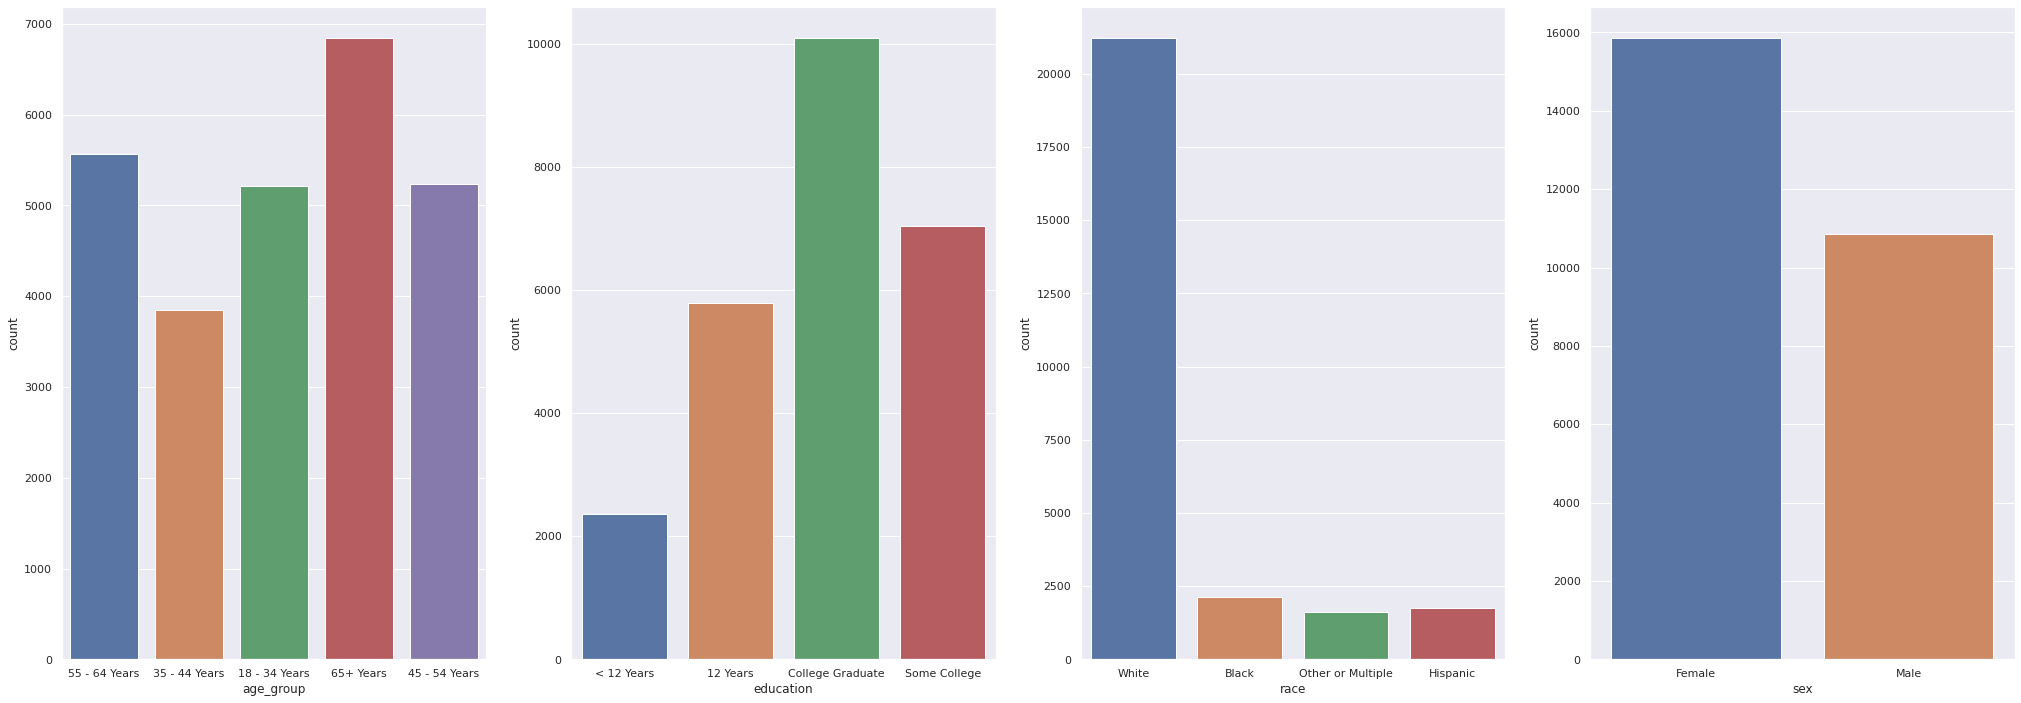

In [552]:
plt.subplot(1,4,1)
sns.countplot(x='age_group',data=cat_attributes)

plt.subplot(1,4,2)
sns.countplot(x='education',data=cat_attributes)

plt.subplot(1,4,3)
sns.countplot(x='race',data=cat_attributes)

plt.subplot(1,4,4)
sns.countplot(x='sex',data=cat_attributes)

<AxesSubplot:xlabel='rent_or_own', ylabel='count'>

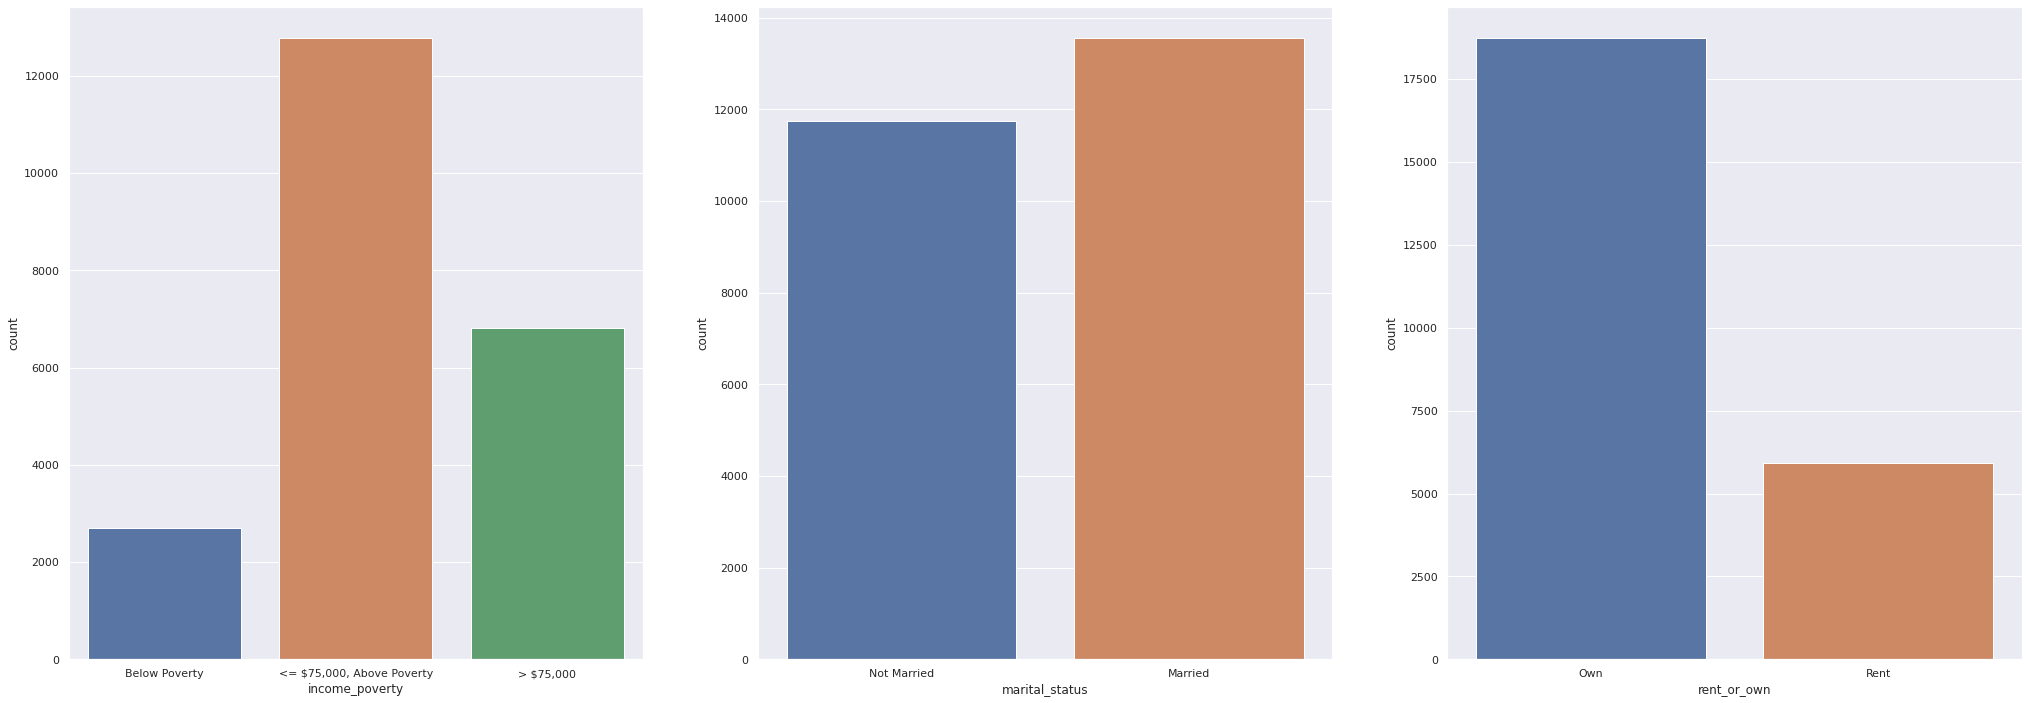

In [29]:
plt.subplot(1,3,1)
sns.countplot(x='income_poverty', data=cat_attributes)

plt.subplot(1,3,2)
sns.countplot(x='marital_status', data=cat_attributes)

plt.subplot(1,3,3)
sns.countplot(x='rent_or_own', data=cat_attributes)

<AxesSubplot:xlabel='census_msa', ylabel='count'>

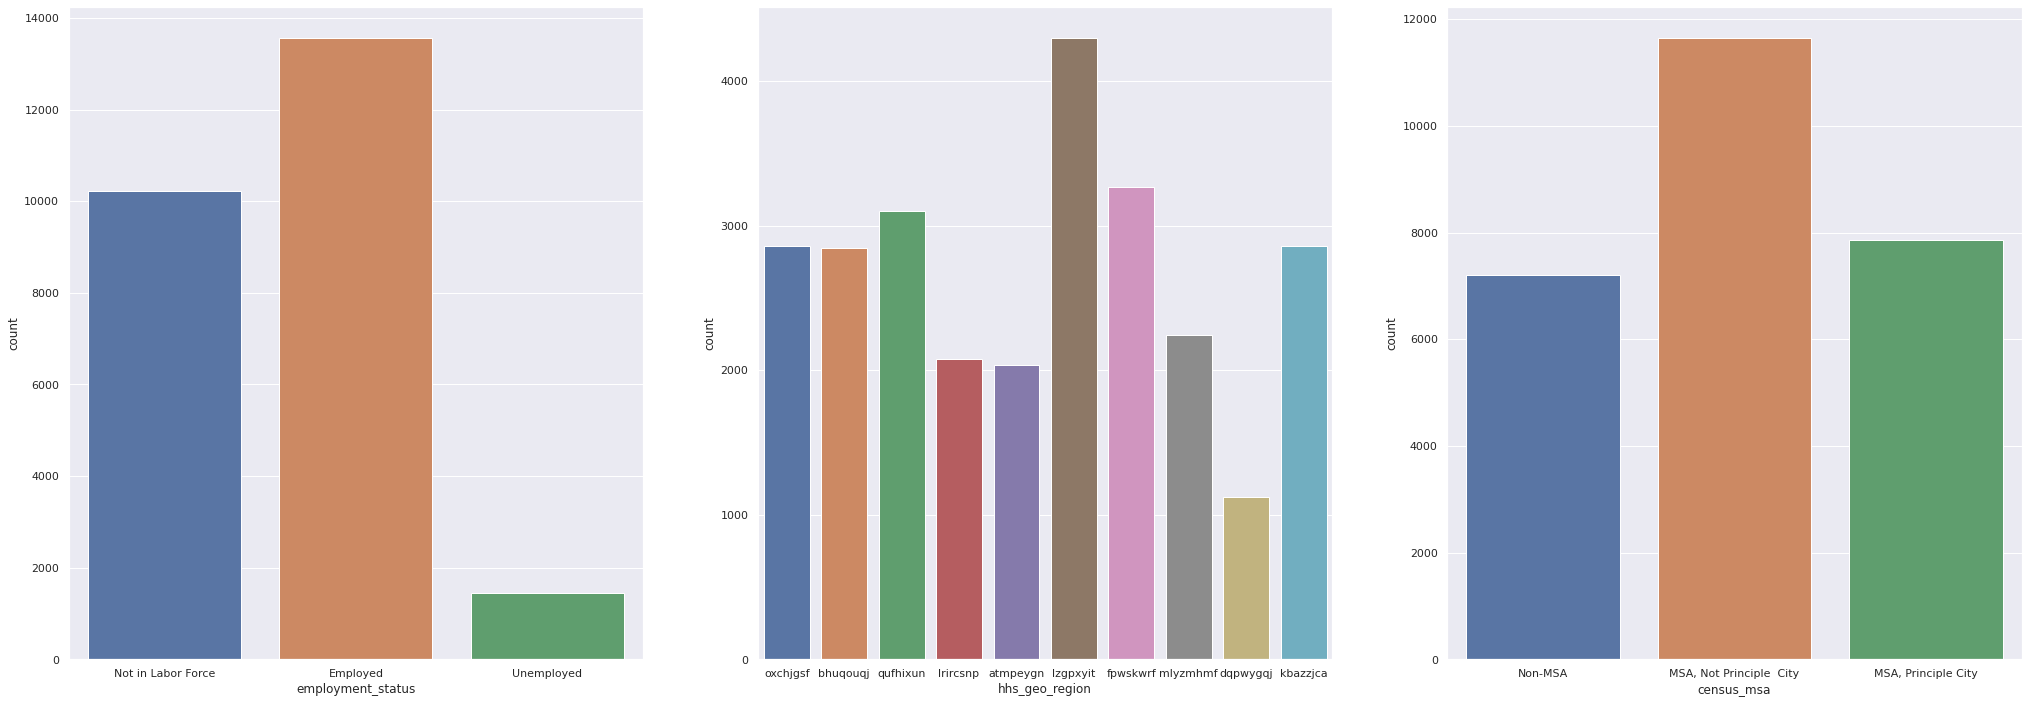

In [30]:
plt.subplot(1,3,1)
sns.countplot(x='employment_status', data=cat_attributes)

plt.subplot(1,3,2)
sns.countplot(x='hhs_geo_region', data=cat_attributes)

plt.subplot(1,3,3)
sns.countplot(x='census_msa', data=cat_attributes)

# 2.0. Feature Engineering

In [598]:
df2 = df1.copy()

### Response Variable

In [599]:
# df2['response'] = df2[['h1n1', 'seasonal']].apply(lambda x: 3 if (x['h1n1'] == 0 & x['seasonal'] == 0) else (4 if (x['h1n1'] == 1 & x['seasonal'] == 1) else 2 if (x['h1n1'] == 1 & x['seasonal'] == 0) else 1), axis=1, raw=False)

# apply and lambda function seem not to work correctly together when the number of conditional arguments is above 3.
# the solution I found for creating the multilabel response variable was to convert to object and bind both features as a string. '00', '01', '10', '11'.
# then I´ll map a function to attribute values from 1 to 4 to each class.

In [600]:
df2['response_aux'] = df2['h1n1'].str.cat(df2['seasonal'])
df2['response'] = df2['h1n1'].str.cat(df2['seasonal'])

# NV --- NO VACCINE
# HV --- VACCINE H1N1
# SV --- SEASONAL VACCINE
# BV --- BOTH VACCINES

dic = {'00': 'NV',
      '01': 'SV',
      '10': 'HV',
      '11': 'BV'}

In [601]:
df2 = df2.replace({'response': dic})
df2

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1,seasonal,response_aux,response
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,00,NV
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1,01,SV
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0,00,NV
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1,01,SV
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0,00,NV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0,00,NV
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0,00,NV
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1,01,SV
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0,00,NV


In [602]:
df2['response'].value_counts()

NV    13295
SV     7738
BV     4697
HV      977
Name: response, dtype: int64

### General Behavior

In [558]:
df2.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1', 'seasonal', 'response_aux',
       'response'],
      dtype='object')

In [559]:
df2[['behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face']]

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
26702,0.0,1.0,0.0,0.0,0.0,1.0,0.0
26703,0.0,1.0,0.0,1.0,0.0,0.0,0.0
26704,0.0,1.0,1.0,1.0,1.0,0.0,1.0
26705,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [560]:
df2['behaviour_general'] = df2['behavioral_antiviral_meds'] + df2['behavioral_avoidance'] + df2['behavioral_face_mask'] + df2['behavioral_wash_hands'] + df2['behavioral_large_gatherings'] + df2['behavioral_outside_home'] + df2['behavioral_touch_face']

<AxesSubplot:xlabel='behaviour_general', ylabel='Count'>

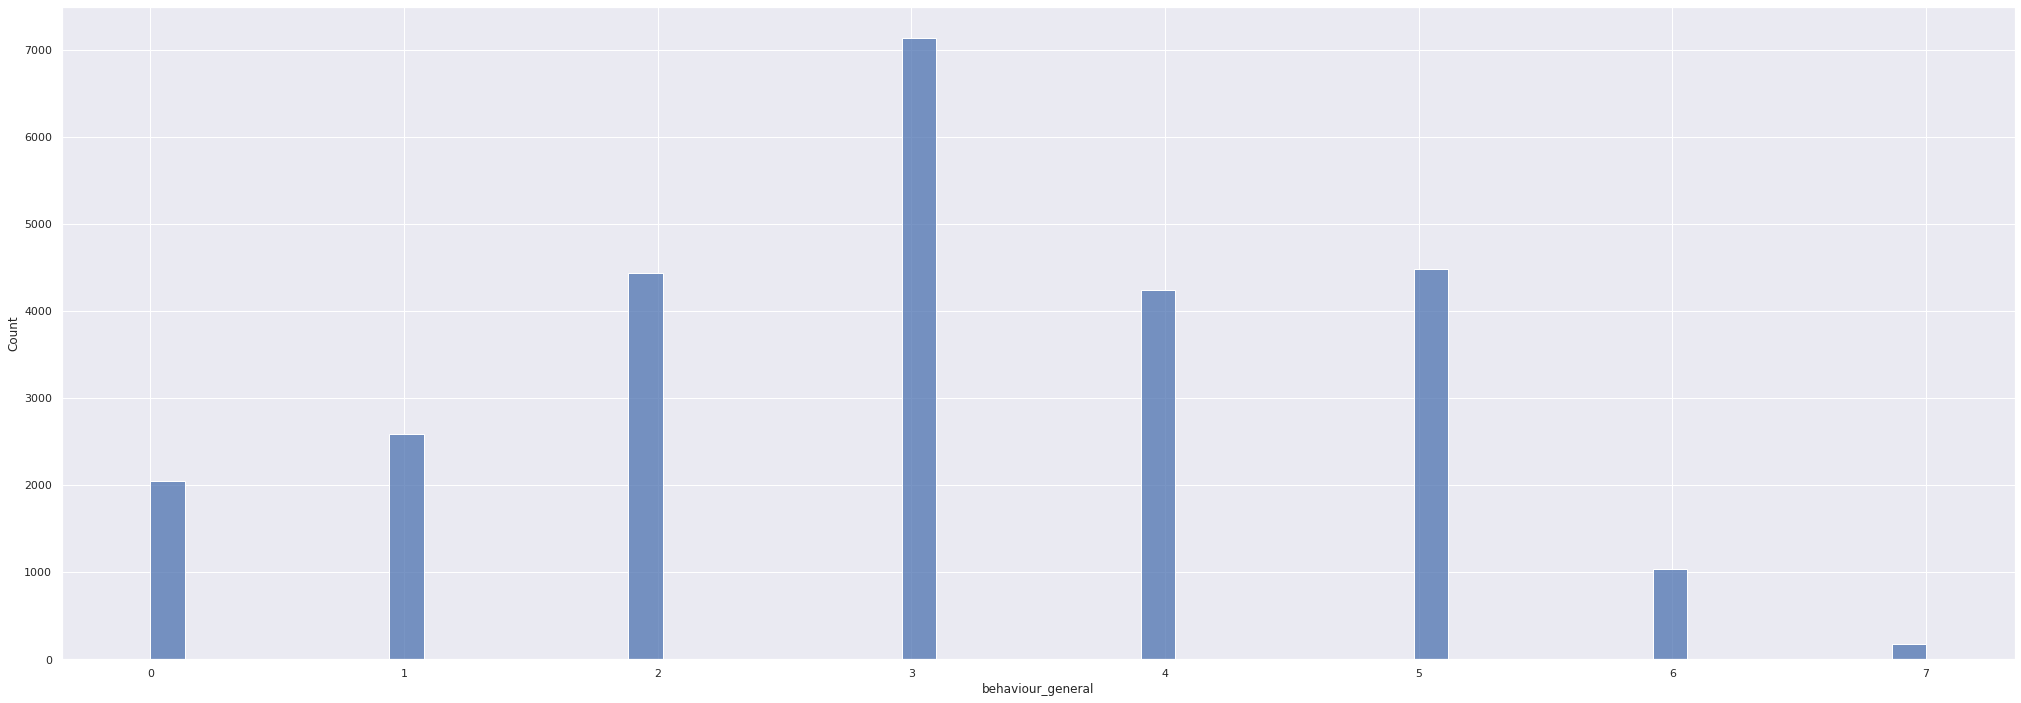

In [561]:
sns.histplot(data = df2['behaviour_general'])

### Employment Status, employment industry, employment ocupation

In [562]:
df2[['employment_status', 'employment_industry', 'employment_occupation']].sample(30)

,employment_status,employment_industry,employment_occupation
7469,Employed,wxleyezf,emcorrxb
26697,Not in Labor Force,NaN,NaN
13738,Employed,nduyfdeo,pvmttkik
20844,Employed,nduyfdeo,xtkaffoo
12889,Not in Labor Force,NaN,NaN
21744,Not in Labor Force,NaN,NaN
26002,Employed,pxcmvdjn,cmhcxjea
9085,Employed,ldnlellj,kldqjyjy
11598,Employed,atmlpfrs,vlluhbov
95,Unemployed,NaN,NaN


## Opinion

In [563]:
df2[['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc']]

,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc
0,3.0,1.0,2.0,2.0,1.0,2.0
1,5.0,4.0,4.0,4.0,2.0,4.0
2,3.0,1.0,1.0,4.0,1.0,2.0
3,3.0,3.0,5.0,5.0,4.0,1.0
4,3.0,3.0,2.0,3.0,1.0,4.0
...,...,...,...,...,...,...
26702,3.0,1.0,1.0,5.0,2.0,2.0
26703,4.0,2.0,2.0,5.0,1.0,1.0
26704,4.0,4.0,2.0,5.0,4.0,2.0
26705,3.0,1.0,2.0,2.0,1.0,2.0


In [564]:
df2['opinion_general'] = df2['opinion_h1n1_vacc_effective'] + df2['opinion_h1n1_risk'] + df2['opinion_h1n1_sick_from_vacc'] + df2['opinion_seas_vacc_effective'] + df2['opinion_seas_risk'] + df2['opinion_seas_sick_from_vacc']

<AxesSubplot:xlabel='opinion_general', ylabel='Count'>

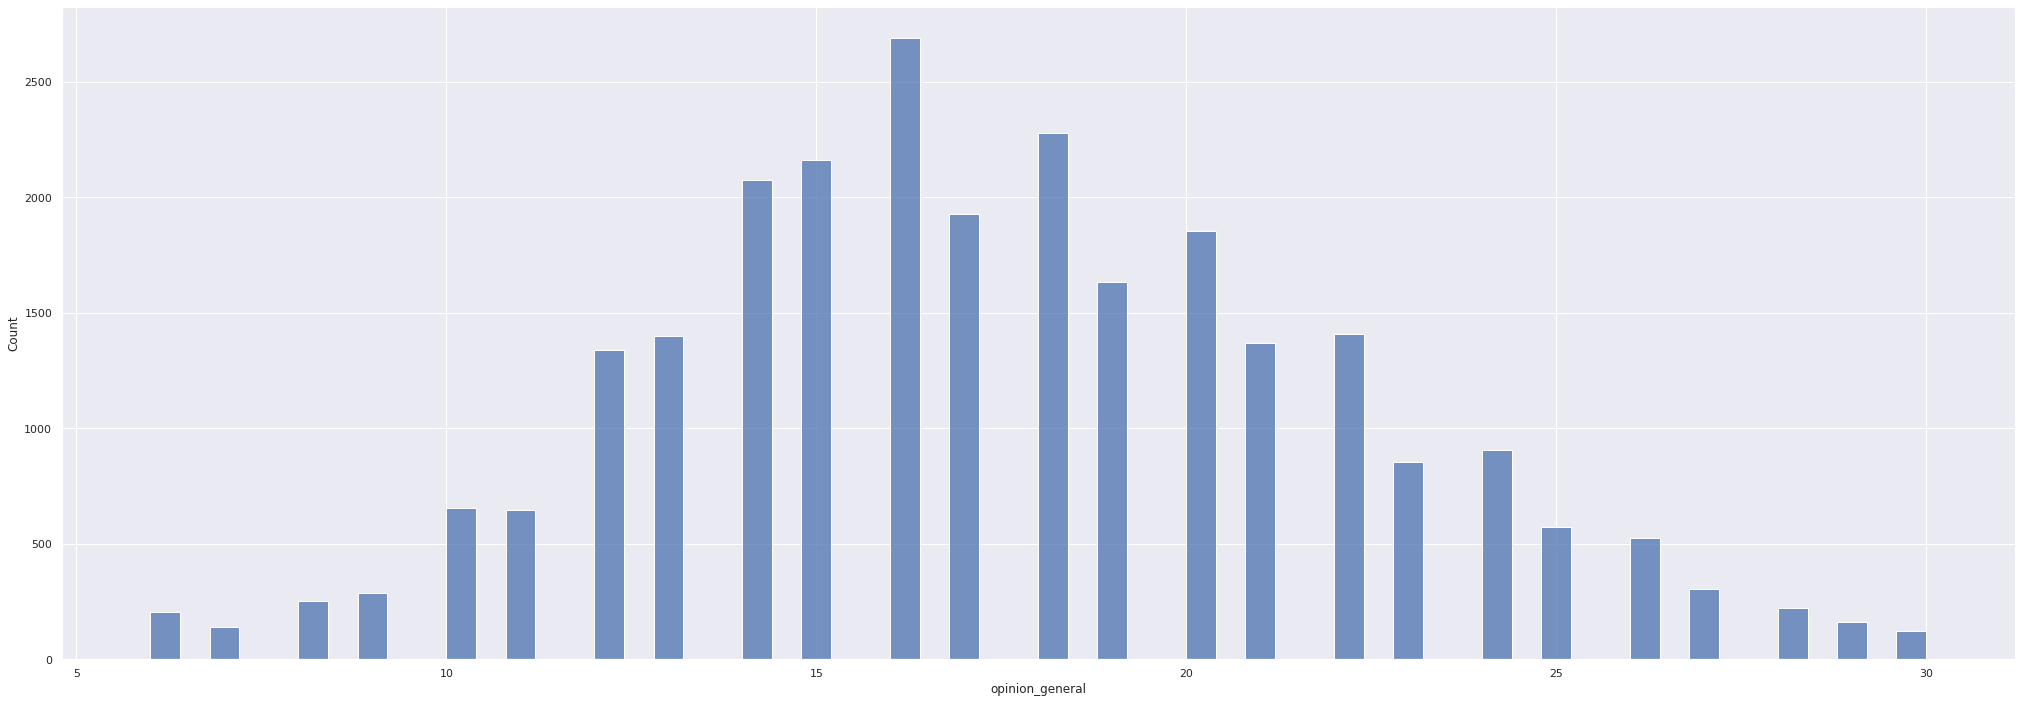

In [565]:
sns.histplot(data = df2['opinion_general'])

# 3.0. Filter

In [566]:
df3 = df2.copy()

# 4.0. Exploratory Data Analysis (EDA)

In [567]:
df4 = df3.copy()

In [568]:
df4.to_csv('../data/interim/df4.csv')

## 4.1. Univariate Analysis

## 4.2. Bivariate Analysis

## 4.3. Multivariate Analysis

## Hypothesis Brainstorm

## Hypothesis Validation

# 5.0. Data Preparation

In [569]:
df5 = df4.copy()

## Rescalling

In [570]:
ss = pp.StandardScaler()
mm = pp.MinMaxScaler()

In [571]:
df5['behaviour_general'] = ss.fit_transform(df5['behaviour_general'].values.reshape(-1,1))
df5['opinion_general'] = ss.fit_transform(df5['opinion_general'].values.reshape(-1,1))

## Encoding

In [572]:
df5 = pd.get_dummies(df5, columns = ['age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'census_msa'])

In [573]:
df5.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'hhs_geo_region',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1', 'seasonal', 'response_aux', 'response',
       'behaviour_general', 'opinion_general', 'age_group_18 - 34 Years',
       'age_group_35 - 44 Years', 'age_group_45 - 54 Years',
       'age_group_55 - 64 Years', 'age_group_65+ Years', 'education_12 Years',
       'education_< 1

## Transformation

## Balancing Response Variable (oversampling)

In [456]:
# unbalanced ratio
df5['response'].value_counts()

NV    13295
SV     7738
BV     4697
HV      977
Name: response, dtype: int64

In [457]:
df5 = df5.drop(['respondent_id', 'health_insurance', 'hhs_geo_region', 'employment_industry', 'employment_occupation', 'h1n1', 'seasonal', 'response_aux'], axis=1)
df5 = df5.dropna()

In [458]:
# df to train SMOTE (Synthetic Minority Oversampling Technique)
df5_aux = df5.drop([ 'response'], axis=1).copy()

# balanced ratio

ratio ={'NV': 13295, 'SV': 13295, 'BV': 13295, 'HV':  13295}

# sampler
sampler = c.SMOTETomek(sampling_strategy=ratio, random_state=42, n_jobs=-1)

# apply sampler.fit_resamples for x and y, and concatenate them back together
X_smt, y_smt = sampler.fit_resample(df5_aux, df5['response'])

/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (13295) in class NV will be larger than the number of samples in the majority class (class #NV -> 11117)
  warnings.warn(
/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (13295) in class SV will be larger than the number of samples in the majority class (class #NV -> 11117)
  warnings.warn(
/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (13295) in class BV will be larger than the number of samples in the majority class (class #NV -> 11117)
  warnings.warn(
/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After ove

In [459]:
X_smt

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,behaviour_general,opinion_general,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,3.000000,1.0,2.000000,2.000000,1.000000,2.0,0.000000,0.000000,-0.651688,-1.394223,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1
1,3.000000,2.000000,0.0,1.0,0.0,1.0,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,5.000000,4.0,4.000000,4.000000,2.000000,4.0,0.000000,0.000000,0.593810,1.207808,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0
2,1.000000,1.000000,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.0,3.000000,3.0,5.000000,5.000000,4.000000,1.0,0.000000,0.000000,-0.028939,0.774136,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0
3,2.000000,1.000000,0.0,1.0,0.0,1.0,1.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,3.000000,3.0,2.000000,3.000000,1.000000,4.0,1.000000,0.000000,0.593810,-0.310043,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0
4,3.000000,1.000000,0.0,1.0,0.0,1.0,0.0,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.0,5.000000,2.0,1.000000,5.000000,4.000000,4.0,2.000000,3.000000,-0.028939,0.774136,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52973,1.000000,1.675355,0.0,0.0,0.0,1.0,0.0,0.000000,0.675355,0.0,0.324645,1.000000,0.000000,1.0,3.324645,2.0,2.000000,4.675355,2.000000,1.0,1.000000,0.000000,-0.853860,-0.526879,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0
52974,3.000000,1.548939,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,0.0,0.548939,0.000000,0.000000,1.0,1.451061,5.0,4.548939,4.548939,4.548939,5.0,1.097877,0.548939,2.462057,1.662703,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0
52975,1.996489,2.000000,0.0,1.0,0.0,1.0,1.0,0.996489,1.000000,0.0,0.000000,0.000000,0.000000,0.0,4.000000,1.0,1.996489,5.000000,2.000000,1.0,1.000000,0.000000,1.214372,-0.527640,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0
52976,1.000000,2.000000,0.0,1.0,0.0,1.0,1.0,0.959980,1.000000,0.0,1.000000,0.000000,0.000000,0.0,5.000000,2.0,1.040020,5.000000,4.000000,1.0,1.000000,0.959980,1.191637,0.132306,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0


In [460]:
df5_balanced = pd.concat([X_smt, y_smt], axis=1)
df5_balanced

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,behaviour_general,opinion_general,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,response
0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,3.000000,1.0,2.000000,2.000000,1.000000,2.0,0.000000,0.000000,-0.651688,-1.394223,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,NV
1,3.000000,2.000000,0.0,1.0,0.0,1.0,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,5.000000,4.0,4.000000,4.000000,2.000000,4.0,0.000000,0.000000,0.593810,1.207808,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,SV
2,1.000000,1.000000,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.0,3.000000,3.0,5.000000,5.000000,4.000000,1.0,0.000000,0.000000,-0.028939,0.774136,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,SV
3,2.000000,1.000000,0.0,1.0,0.0,1.0,1.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,3.000000,3.0,2.000000,3.000000,1.000000,4.0,1.000000,0.000000,0.593810,-0.310043,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,NV
4,3.000000,1.000000,0.0,1.0,0.0,1.0,0.0,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.0,5.000000,2.0,1.000000,5.000000,4.000000,4.0,2.000000,3.000000,-0.028939,0.774136,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,NV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52973,1.000000,1.675355,0.0,0.0,0.0,1.0,0.0,0.000000,0.675355,0.0,0.324645,1.000000,0.000000,1.0,3.324645,2.0,2.000000,4.675355,2.000000,1.0,1.000000,0.000000,-0.853860,-0.526879,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,SV
52974,3.000000,1.548939,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,0.0,0.548939,0.000000,0.000000,1.0,1.451061,5.0,4.548939,4.548939,4.548939,5.0,1.097877,0.548939,2.462057,1.662703,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,SV
52975,1.996489,2.000000,0.0,1.0,0.0,1.0,1.0,0.996489,1.000000,0.0,0.000000,0.000000,0.000000,0.0,4.000000,1.0,1.996489,5.000000,2.000000,1.0,1.000000,0.000000,1.214372,-0.527640,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,SV
52976,1.000000,2.000000,0.0,1.0,0.0,1.0,1.0,0.959980,1.000000,0.0,1.000000,0.000000,0.000000,0.0,5.000000,2.0,1.040020,5.000000,4.000000,1.0,1.000000,0.959980,1.191637,0.132306,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,SV


# 6.0. Features Selection

In [608]:
# df6 = df5_balanced.copy()

In [464]:
# df6.shape

(52978, 53)

In [610]:
# df6.to_csv('../data/interim/df6.csv', index=False)
df6 = pd.read_csv('../data/interim/df6.csv')

In [611]:
df6

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,behaviour_general,opinion_general,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,response
0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,3.000000,1.0,2.000000,2.000000,1.000000,2.0,0.000000,0.000000,-0.651688,-1.394223,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,NV
1,3.000000,2.000000,0.0,1.0,0.0,1.0,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,5.000000,4.0,4.000000,4.000000,2.000000,4.0,0.000000,0.000000,0.593810,1.207808,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,SV
2,1.000000,1.000000,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.0,3.000000,3.0,5.000000,5.000000,4.000000,1.0,0.000000,0.000000,-0.028939,0.774136,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,SV
3,2.000000,1.000000,0.0,1.0,0.0,1.0,1.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,3.000000,3.0,2.000000,3.000000,1.000000,4.0,1.000000,0.000000,0.593810,-0.310043,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,NV
4,3.000000,1.000000,0.0,1.0,0.0,1.0,0.0,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.0,5.000000,2.0,1.000000,5.000000,4.000000,4.0,2.000000,3.000000,-0.028939,0.774136,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,NV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52973,1.000000,1.675355,0.0,0.0,0.0,1.0,0.0,0.000000,0.675355,0.0,0.324645,1.000000,0.000000,1.0,3.324645,2.0,2.000000,4.675355,2.000000,1.0,1.000000,0.000000,-0.853860,-0.526879,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,SV
52974,3.000000,1.548939,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,0.0,0.548939,0.000000,0.000000,1.0,1.451061,5.0,4.548939,4.548939,4.548939,5.0,1.097877,0.548939,2.462057,1.662703,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,SV
52975,1.996489,2.000000,0.0,1.0,0.0,1.0,1.0,0.996489,1.000000,0.0,0.000000,0.000000,0.000000,0.0,4.000000,1.0,1.996489,5.000000,2.000000,1.0,1.000000,0.000000,1.214372,-0.527640,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,SV
52976,1.000000,2.000000,0.0,1.0,0.0,1.0,1.0,0.959980,1.000000,0.0,1.000000,0.000000,0.000000,0.0,5.000000,2.0,1.040020,5.000000,4.000000,1.0,1.000000,0.959980,1.191637,0.132306,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,SV


In [613]:
# NV --- NO VACCINE
# HV --- VACCINE H1N1
# SV --- SEASONAL VACCINE
# BV --- BOTH VACCINES

dic = {'NV': '00',
      'SV': '01',
      'HV': '10',
      'BV': '11'}

df_aux = df6.replace({'response': dic})
df_aux

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,behaviour_general,opinion_general,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,response
0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,3.000000,1.0,2.000000,2.000000,1.000000,2.0,0.000000,0.000000,-0.651688,-1.394223,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,00
1,3.000000,2.000000,0.0,1.0,0.0,1.0,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,5.000000,4.0,4.000000,4.000000,2.000000,4.0,0.000000,0.000000,0.593810,1.207808,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,01
2,1.000000,1.000000,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.0,3.000000,3.0,5.000000,5.000000,4.000000,1.0,0.000000,0.000000,-0.028939,0.774136,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,01
3,2.000000,1.000000,0.0,1.0,0.0,1.0,1.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,3.000000,3.0,2.000000,3.000000,1.000000,4.0,1.000000,0.000000,0.593810,-0.310043,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,00
4,3.000000,1.000000,0.0,1.0,0.0,1.0,0.0,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.0,5.000000,2.0,1.000000,5.000000,4.000000,4.0,2.000000,3.000000,-0.028939,0.774136,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52973,1.000000,1.675355,0.0,0.0,0.0,1.0,0.0,0.000000,0.675355,0.0,0.324645,1.000000,0.000000,1.0,3.324645,2.0,2.000000,4.675355,2.000000,1.0,1.000000,0.000000,-0.853860,-0.526879,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,01
52974,3.000000,1.548939,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,0.0,0.548939,0.000000,0.000000,1.0,1.451061,5.0,4.548939,4.548939,4.548939,5.0,1.097877,0.548939,2.462057,1.662703,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,01
52975,1.996489,2.000000,0.0,1.0,0.0,1.0,1.0,0.996489,1.000000,0.0,0.000000,0.000000,0.000000,0.0,4.000000,1.0,1.996489,5.000000,2.000000,1.0,1.000000,0.000000,1.214372,-0.527640,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,01
52976,1.000000,2.000000,0.0,1.0,0.0,1.0,1.0,0.959980,1.000000,0.0,1.000000,0.000000,0.000000,0.0,5.000000,2.0,1.040020,5.000000,4.000000,1.0,1.000000,0.959980,1.191637,0.132306,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,01


In [619]:
df_aux['h1n1'] = df_aux['response'].apply(lambda x: 1 if (x=='10') | (x=='11') else 0)
df_aux['seasonal'] = df_aux['response'].apply(lambda x: 1 if (x=='01') | (x=='11') else 0)

In [620]:
df_aux.sample(30)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,behaviour_general,opinion_general,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,response,h1n1,seasonal
45322,1.000000,1.000000,0.000000,0.969062,0.0,0.000000,0.030938,0.000000,0.000000,0.000000,0.969062,0.000000,0.000000,0.000000,3.000000,1.000000,2.000000,2.030938,1.969062,2.000000,1.000000,0.000000,-1.274437,-1.177387,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,00,0,0
41083,2.492456,1.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.492456,1.000000,0.507544,0.507544,0.000000,0.000000,0.492456,3.507544,4.000000,5.000000,4.000000,2.000000,1.000000,1.507544,0.000000,0.900486,0.450518,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1,10,1,0
15926,2.000000,2.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,2.000000,5.000000,2.000000,1.000000,2.000000,1.000000,-0.651688,0.340465,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,11,1,1
39664,2.825444,1.000000,0.087278,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.087278,0.000000,0.000000,0.912722,0.000000,4.087278,4.912722,2.000000,5.000000,5.000000,4.912722,1.174556,3.000000,1.270911,1.839391,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,10,1,0
2350,2.000000,2.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.593810,-0.743715,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,1,0,1,0,0,0,0,1,00,0,0
24308,3.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.486372,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.513628,4.000000,1.000000,4.513628,4.000000,1.000000,1.486372,1.513628,0.273949,0.346375,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,11,1,1
34970,1.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.090335,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.090335,4.909665,1.000000,1.000000,0.000000,0.000000,-1.897186,-0.743715,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,10,1,0
25908,1.322873,2.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.322873,4.322873,4.000000,2.000000,4.000000,2.000000,1.677127,1.000000,0.000000,-0.651688,0.123629,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,11,1,1
17234,2.000000,2.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1.000000,5.000000,5.000000,1.000000,0.000000,0.000000,0.593810,0.774136,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,11,1,1
1295,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,1.000000,-1.897186,-1.177387,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,0,0,1,00,0,0


In [622]:
df6 = df_aux.drop('response', axis=1).copy()

## Train-test Split

In [623]:
x_train_n = df6.drop(['h1n1', 'seasonal'], axis=1)
y_train_n = df6['h1n1'].values

## Feature Importance

In [624]:
# feature importance
forest = en.ExtraTreesClassifier(n_estimators=250, random_state=42, n_jobs=-1)
forest.fit(x_train_n, y_train_n)

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=42)

In [625]:
forest.feature_importances_

array([0.02497789, 0.02315606, 0.00670621, 0.01582089, 0.00808824,
       0.0113688 , 0.01657885, 0.01567659, 0.01697303, 0.13727747,
       0.0267539 , 0.01839938, 0.01217836, 0.02037641, 0.06352669,
       0.06711258, 0.02572376, 0.02343225, 0.02862244, 0.02406187,
       0.01862274, 0.01786838, 0.02122263, 0.03470211, 0.01043701,
       0.01022374, 0.01176622, 0.01132591, 0.01230541, 0.01299019,
       0.00703704, 0.01394225, 0.01353716, 0.00656977, 0.00464583,
       0.00397174, 0.01350688, 0.01662292, 0.01466805, 0.01592457,
       0.01196739, 0.00611593, 0.01319915, 0.01325004, 0.0130629 ,
       0.00971159, 0.01363408, 0.01319635, 0.00414263, 0.01602413,
       0.01429396, 0.01269968])

In [626]:
# plotting importance results
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]


In [627]:
# print the feature ranking
print('Feature ranking:')
df = pd.DataFrame()
for i, j in zip(x_train_n, forest.feature_importances_):
    aux = pd.DataFrame({'feature': i, 'importance': j}, index=[0])
    df= pd.concat([df, aux], axis=0)
    
df.sort_values('importance', ascending=False).reset_index()

Feature ranking:


,index,feature,importance
0,0,doctor_recc_h1n1,0.137277
1,0,opinion_h1n1_risk,0.067113
2,0,opinion_h1n1_vacc_effective,0.063527
3,0,opinion_general,0.034702
4,0,opinion_seas_risk,0.028622
5,0,doctor_recc_seasonal,0.026754
6,0,opinion_h1n1_sick_from_vacc,0.025724
7,0,h1n1_concern,0.024978
8,0,opinion_seas_sick_from_vacc,0.024062
9,0,opinion_seas_vacc_effective,0.023432


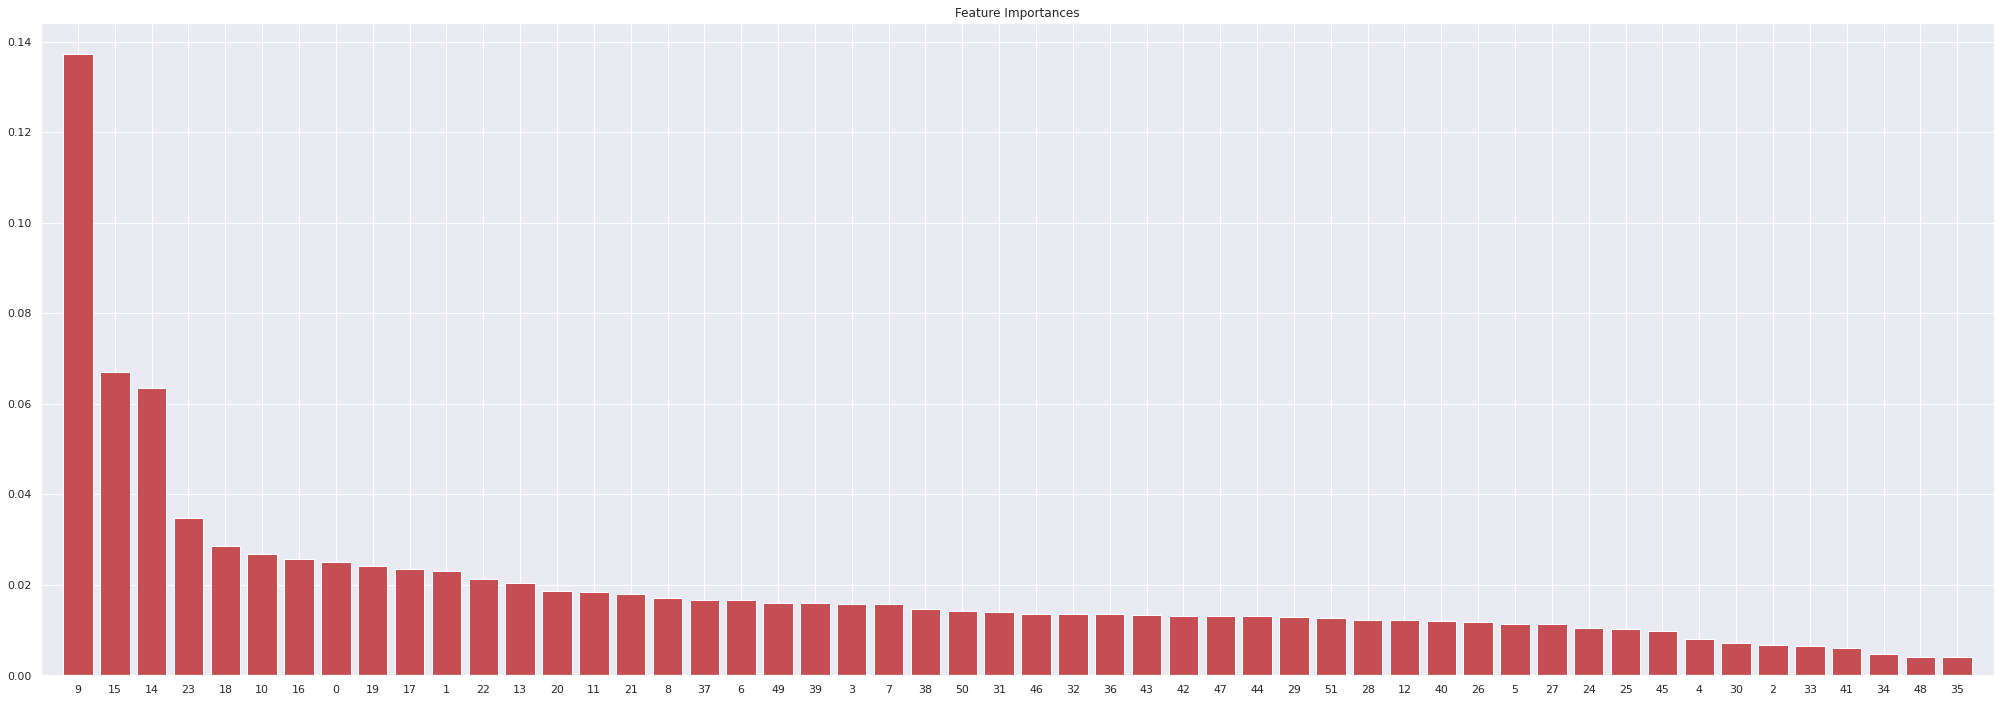

In [628]:
# plot the impurity-base feature importance of the forest
plt.figure()
plt.title('Feature Importances')
plt.bar(range(x_train_n.shape[1]), importances[indices], color='r', align='center')
plt.xticks(range(x_train_n.shape[1]), indices)
plt.xlim([-1, x_train_n.shape[1]])
plt.show()

In [629]:
# results for h1n1
cols_imp = df.sort_values('importance', ascending=False).reset_index().loc[:12,:]['feature'].values
cols_imp

array(['doctor_recc_h1n1', 'opinion_h1n1_risk',
       'opinion_h1n1_vacc_effective', 'opinion_general',
       'opinion_seas_risk', 'doctor_recc_seasonal',
       'opinion_h1n1_sick_from_vacc', 'h1n1_concern',
       'opinion_seas_sick_from_vacc', 'opinion_seas_vacc_effective',
       'h1n1_knowledge', 'behaviour_general', 'health_worker'],
      dtype=object)

In [382]:
# cols_importance = list(set(cols_h1n1) | set(cols_seasonal))
# cols_importance

## Boruta

In [475]:
# define model
et = en.ExtraTreesClassifier(n_jobs=-1)

# define Boruta
boruta = bt.BorutaPy(et, n_estimators='auto', verbose=2, random_state=42).fit(x_train_n.values, y_train_n)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	52
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	52
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	52
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	52
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	52
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	52
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	52
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	40
Tentative: 	2
Rejected: 	10
Iteration: 	9 / 100
Confirmed: 	40
Tentative: 	2
Rejected: 	10
Iteration: 	10 / 100
Confirmed: 	40
Tentative: 	2
Rejected: 	10
Iteration: 	11 / 100
Confirmed: 	40
Tentative: 	2
Rejected: 	10
Iteration: 	12 / 100
Confirmed: 	40
Tentative: 	2
Rejected: 	10
Iteration: 	13 / 100
Confirmed: 	40
Tentative: 	2
Rejected: 	10
Iteration: 	14 / 100
Confirmed: 	40
Tentative: 	2
Rejected: 	10
Iteration: 	15 / 100
Confirmed: 	40
Tentative: 	2
Rejected: 	10
Iteration: 	16 / 100
Confirmed: 	40
Tentative: 	2
Reject

In [476]:
boruta.ranking_

array([ 1,  1,  7,  1,  6,  2,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  5,  1,  1,  1,  1, 10,  1,  1,  9,
       11, 13,  1,  1,  1,  1,  1,  8,  1,  1,  1,  4,  1,  1, 12,  1,  1,
        1])

In [477]:
cols_bor = boruta.support_.tolist()

In [478]:
cols_boruta = x_train_n.iloc[:, cols_bor].columns
cols_boruta

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_avoidance',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'household_adults', 'household_children',
       'behaviour_general', 'opinion_general', 'age_group_18 - 34 Years',
       'age_group_45 - 54 Years', 'age_group_55 - 64 Years',
       'age_group_65+ Years', 'education_12 Years',
       'education_College Graduate', 'education_Some College', 'race_White',
       'sex_Female', 'sex_Male', 'income_poverty_<= $75,000, Above Poverty',
       'income_poverty_> $75,000', 'marital_status_Married',
       'marital_status_Not Married', 'rent_or_own_Own',
       'employment_status_Employed', 'employment_status_No

## Manual Selection

In [479]:
cols_boruta.tolist()

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_avoidance',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'behaviour_general',
 'opinion_general',
 'age_group_18 - 34 Years',
 'age_group_45 - 54 Years',
 'age_group_55 - 64 Years',
 'age_group_65+ Years',
 'education_12 Years',
 'education_College Graduate',
 'education_Some College',
 'race_White',
 'sex_Female',
 'sex_Male',
 'income_poverty_<= $75,000, Above Poverty',
 'income_poverty_> $75,000',
 'marital_status_Married',
 'marital_status_Not Married',
 'rent_or_own_Own',
 'employment_status_Employed',
 'employment_status_Not in Labor Force',
 'census_msa_MSA, Not Principle  City',
 'census_

In [480]:
cols_imp.tolist()

['doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'opinion_seas_risk',
 'opinion_h1n1_risk',
 'opinion_seas_vacc_effective',
 'opinion_h1n1_vacc_effective',
 'opinion_general',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_sick_from_vacc',
 'h1n1_concern',
 'h1n1_knowledge',
 'behaviour_general',
 'household_children',
 'household_adults']

# 7. Modeling

In [661]:
df7 = df6[['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_avoidance',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'behaviour_general',
 'opinion_general',
 'age_group_18 - 34 Years',
 'age_group_45 - 54 Years',
 'age_group_55 - 64 Years',
 'age_group_65+ Years',
 'education_12 Years',
 'education_College Graduate',
 'education_Some College',
 'race_White',
 'sex_Female',
 'sex_Male',
 'income_poverty_<= $75,000, Above Poverty',
 'income_poverty_> $75,000',
 'marital_status_Married',
 'marital_status_Not Married',
 'rent_or_own_Own',
 'employment_status_Employed',
 'employment_status_Not in Labor Force',
 'census_msa_MSA, Not Principle  City',
 'census_msa_MSA, Principle City',
 'census_msa_Non-MSA', 'h1n1', 'seasonal']].copy()

### Cross Validation

In [662]:
df7.columns = ['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_avoidance',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'behaviour_general',
 'opinion_general',
 'age_group_18 - 34 Years',
 'age_group_45 - 54 Years',
 'age_group_55 - 64 Years',
 'age_group_65+ Years',
 'education_12 Years',
 'education_College Graduate',
 'education_Some College',
 'race_White',
 'sex_Female',
 'sex_Male',
 'income_poverty_= $75,000, Above Poverty',
 'income_poverty_ $75,000',
 'marital_status_Married',
 'marital_status_Not Married',
 'rent_or_own_Own',
 'employment_status_Employed',
 'employment_status_Not in Labor Force',
 'census_msa_MSA, Not Principle  City',
 'census_msa_MSA, Principle City',
 'census_msa_Non-MSA',
 'h1n1', 'seasonal']

## 7.1. For 'h1n1' Target Variable

In [677]:
X = df7.drop(['h1n1', 'seasonal'], axis=1)
y = df7['h1n1'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## XGBoost

* With cols_boruta ROC AUC score is 0.9436463473678455

In [501]:
# model
xgb = XGBClassifier(eval_metric='mlogloss')

# train
xgb.fit(X_train, y_train)

# predict
y_hat = xgb.predict(X_test)

# performance
print(m.confusion_matrix(y_test, y_hat))
print(m.classification_report(y_test, y_hat))
print(m.roc_auc_score(y_test,xgb.predict_proba(X_test), multi_class='ovr'))

[[2073  133  175  295]
 [  40 2465   90   25]
 [ 180  109 2084  308]
 [ 349   81  387 1802]]
              precision    recall  f1-score   support

          BV       0.78      0.77      0.78      2676
          HV       0.88      0.94      0.91      2620
          NV       0.76      0.78      0.77      2681
          SV       0.74      0.69      0.71      2619

    accuracy                           0.80     10596
   macro avg       0.79      0.80      0.79     10596
weighted avg       0.79      0.80      0.79     10596

0.9436463473678455


## CatBoost

* With cols_boruta ROC AUC score is 0.9469340966526655

In [503]:
# model
cat = CatBoostClassifier()

# train
cat.fit(X_train, y_train)

# predict
y_hat = cat.predict(X_test)

# performance
print(m.confusion_matrix(y_test, y_hat))
print(m.classification_report(y_test, y_hat))
print(m.roc_auc_score(y_test,cat.predict_proba(X_test), multi_class='ovr'))

Learning rate set to 0.095788
0:	learn: 1.3160378	total: 92.2ms	remaining: 1m 32s
1:	learn: 1.2605167	total: 150ms	remaining: 1m 14s
2:	learn: 1.2172237	total: 195ms	remaining: 1m 4s
3:	learn: 1.1805408	total: 240ms	remaining: 59.8s
4:	learn: 1.1507392	total: 280ms	remaining: 55.8s
5:	learn: 1.1249093	total: 326ms	remaining: 54s
6:	learn: 1.1025368	total: 375ms	remaining: 53.1s
7:	learn: 1.0820374	total: 421ms	remaining: 52.2s
8:	learn: 1.0647337	total: 459ms	remaining: 50.6s
9:	learn: 1.0498139	total: 500ms	remaining: 49.5s
10:	learn: 1.0370963	total: 540ms	remaining: 48.5s
11:	learn: 1.0254391	total: 596ms	remaining: 49s
12:	learn: 1.0142066	total: 676ms	remaining: 51.3s
13:	learn: 1.0039861	total: 734ms	remaining: 51.7s
14:	learn: 0.9943196	total: 774ms	remaining: 50.8s
15:	learn: 0.9851447	total: 828ms	remaining: 50.9s
16:	learn: 0.9773551	total: 893ms	remaining: 51.6s
17:	learn: 0.9699063	total: 964ms	remaining: 52.6s
18:	learn: 0.9625496	total: 1.01s	remaining: 52s
19:	learn: 0.9

164:	learn: 0.6813362	total: 9.67s	remaining: 48.9s
165:	learn: 0.6804835	total: 9.71s	remaining: 48.8s
166:	learn: 0.6794834	total: 9.75s	remaining: 48.6s
167:	learn: 0.6785273	total: 9.79s	remaining: 48.5s
168:	learn: 0.6776884	total: 9.83s	remaining: 48.3s
169:	learn: 0.6771712	total: 9.86s	remaining: 48.1s
170:	learn: 0.6765218	total: 9.91s	remaining: 48.1s
171:	learn: 0.6758704	total: 9.96s	remaining: 47.9s
172:	learn: 0.6751646	total: 10s	remaining: 47.9s
173:	learn: 0.6742557	total: 10.1s	remaining: 47.9s
174:	learn: 0.6732268	total: 10.1s	remaining: 47.8s
175:	learn: 0.6725592	total: 10.2s	remaining: 47.7s
176:	learn: 0.6718322	total: 10.3s	remaining: 47.7s
177:	learn: 0.6713965	total: 10.4s	remaining: 47.8s
178:	learn: 0.6706609	total: 10.4s	remaining: 47.8s
179:	learn: 0.6700628	total: 10.5s	remaining: 47.7s
180:	learn: 0.6691241	total: 10.5s	remaining: 47.6s
181:	learn: 0.6686727	total: 10.6s	remaining: 47.5s
182:	learn: 0.6680253	total: 10.7s	remaining: 47.6s
183:	learn: 0.

327:	learn: 0.5816281	total: 18.8s	remaining: 38.5s
328:	learn: 0.5810991	total: 18.9s	remaining: 38.5s
329:	learn: 0.5808874	total: 18.9s	remaining: 38.4s
330:	learn: 0.5805582	total: 18.9s	remaining: 38.3s
331:	learn: 0.5801295	total: 19s	remaining: 38.2s
332:	learn: 0.5794923	total: 19.1s	remaining: 38.2s
333:	learn: 0.5790616	total: 19.1s	remaining: 38.2s
334:	learn: 0.5787740	total: 19.2s	remaining: 38.1s
335:	learn: 0.5780534	total: 19.3s	remaining: 38.1s
336:	learn: 0.5776527	total: 19.3s	remaining: 38.1s
337:	learn: 0.5772141	total: 19.4s	remaining: 38.1s
338:	learn: 0.5767202	total: 19.5s	remaining: 38s
339:	learn: 0.5762543	total: 19.6s	remaining: 38.1s
340:	learn: 0.5759919	total: 19.7s	remaining: 38.1s
341:	learn: 0.5756070	total: 19.8s	remaining: 38s
342:	learn: 0.5749927	total: 19.8s	remaining: 38s
343:	learn: 0.5743520	total: 19.9s	remaining: 37.9s
344:	learn: 0.5739187	total: 19.9s	remaining: 37.8s
345:	learn: 0.5733150	total: 20s	remaining: 37.8s
346:	learn: 0.5729429	

489:	learn: 0.5176536	total: 28.4s	remaining: 29.6s
490:	learn: 0.5173149	total: 28.5s	remaining: 29.5s
491:	learn: 0.5168215	total: 28.5s	remaining: 29.5s
492:	learn: 0.5165580	total: 28.6s	remaining: 29.4s
493:	learn: 0.5161662	total: 28.6s	remaining: 29.3s
494:	learn: 0.5157533	total: 28.7s	remaining: 29.2s
495:	learn: 0.5155680	total: 28.7s	remaining: 29.2s
496:	learn: 0.5152011	total: 28.7s	remaining: 29.1s
497:	learn: 0.5146819	total: 28.8s	remaining: 29s
498:	learn: 0.5143741	total: 28.8s	remaining: 28.9s
499:	learn: 0.5141143	total: 28.9s	remaining: 28.9s
500:	learn: 0.5135784	total: 28.9s	remaining: 28.8s
501:	learn: 0.5133402	total: 29s	remaining: 28.7s
502:	learn: 0.5130491	total: 29s	remaining: 28.7s
503:	learn: 0.5127433	total: 29.1s	remaining: 28.6s
504:	learn: 0.5125899	total: 29.1s	remaining: 28.6s
505:	learn: 0.5124758	total: 29.2s	remaining: 28.5s
506:	learn: 0.5120578	total: 29.3s	remaining: 28.4s
507:	learn: 0.5117588	total: 29.3s	remaining: 28.4s
508:	learn: 0.5115

651:	learn: 0.4680054	total: 37.2s	remaining: 19.8s
652:	learn: 0.4677659	total: 37.3s	remaining: 19.8s
653:	learn: 0.4676028	total: 37.3s	remaining: 19.7s
654:	learn: 0.4673604	total: 37.3s	remaining: 19.7s
655:	learn: 0.4670646	total: 37.4s	remaining: 19.6s
656:	learn: 0.4667365	total: 37.4s	remaining: 19.5s
657:	learn: 0.4665432	total: 37.5s	remaining: 19.5s
658:	learn: 0.4662274	total: 37.5s	remaining: 19.4s
659:	learn: 0.4659556	total: 37.6s	remaining: 19.3s
660:	learn: 0.4657175	total: 37.6s	remaining: 19.3s
661:	learn: 0.4653417	total: 37.7s	remaining: 19.2s
662:	learn: 0.4651348	total: 37.7s	remaining: 19.2s
663:	learn: 0.4647800	total: 37.8s	remaining: 19.1s
664:	learn: 0.4643012	total: 37.9s	remaining: 19.1s
665:	learn: 0.4639835	total: 37.9s	remaining: 19s
666:	learn: 0.4636849	total: 38s	remaining: 19s
667:	learn: 0.4634561	total: 38s	remaining: 18.9s
668:	learn: 0.4632882	total: 38.1s	remaining: 18.8s
669:	learn: 0.4630012	total: 38.1s	remaining: 18.8s
670:	learn: 0.462833

811:	learn: 0.4277848	total: 46.6s	remaining: 10.8s
812:	learn: 0.4275464	total: 46.6s	remaining: 10.7s
813:	learn: 0.4273750	total: 46.7s	remaining: 10.7s
814:	learn: 0.4271035	total: 46.7s	remaining: 10.6s
815:	learn: 0.4268780	total: 46.8s	remaining: 10.6s
816:	learn: 0.4265622	total: 46.9s	remaining: 10.5s
817:	learn: 0.4264087	total: 46.9s	remaining: 10.4s
818:	learn: 0.4261740	total: 46.9s	remaining: 10.4s
819:	learn: 0.4258148	total: 47s	remaining: 10.3s
820:	learn: 0.4256887	total: 47.1s	remaining: 10.3s
821:	learn: 0.4254511	total: 47.2s	remaining: 10.2s
822:	learn: 0.4251644	total: 47.2s	remaining: 10.2s
823:	learn: 0.4248733	total: 47.3s	remaining: 10.1s
824:	learn: 0.4246882	total: 47.3s	remaining: 10s
825:	learn: 0.4245320	total: 47.4s	remaining: 9.98s
826:	learn: 0.4243828	total: 47.4s	remaining: 9.93s
827:	learn: 0.4241361	total: 47.5s	remaining: 9.88s
828:	learn: 0.4239799	total: 47.6s	remaining: 9.82s
829:	learn: 0.4237427	total: 47.7s	remaining: 9.77s
830:	learn: 0.42

970:	learn: 0.3933946	total: 55s	remaining: 1.64s
971:	learn: 0.3931454	total: 55.1s	remaining: 1.58s
972:	learn: 0.3930025	total: 55.1s	remaining: 1.53s
973:	learn: 0.3928360	total: 55.2s	remaining: 1.47s
974:	learn: 0.3926694	total: 55.3s	remaining: 1.42s
975:	learn: 0.3925407	total: 55.3s	remaining: 1.36s
976:	learn: 0.3923777	total: 55.4s	remaining: 1.3s
977:	learn: 0.3922557	total: 55.4s	remaining: 1.25s
978:	learn: 0.3920150	total: 55.4s	remaining: 1.19s
979:	learn: 0.3918578	total: 55.5s	remaining: 1.13s
980:	learn: 0.3916231	total: 55.5s	remaining: 1.07s
981:	learn: 0.3914548	total: 55.6s	remaining: 1.02s
982:	learn: 0.3912382	total: 55.6s	remaining: 962ms
983:	learn: 0.3910133	total: 55.7s	remaining: 905ms
984:	learn: 0.3908287	total: 55.7s	remaining: 848ms
985:	learn: 0.3905540	total: 55.8s	remaining: 792ms
986:	learn: 0.3903176	total: 55.8s	remaining: 735ms
987:	learn: 0.3899736	total: 55.8s	remaining: 678ms
988:	learn: 0.3897127	total: 55.9s	remaining: 622ms
989:	learn: 0.3

## Random Forest

* With cols_boruta ROC AUC score is 0.9629287470053814

In [658]:
# model
rf = en.RandomForestClassifier(random_state=42, n_jobs=-1)

# train
rf.fit(X_train, y_train)

# predict
y_hat = rf.predict(X_test)

# performance
print(m.confusion_matrix(y_test, y_hat))
print(m.classification_report(y_test, y_hat))
print(m.roc_auc_score(y_test,rf.predict_proba(X_test)[:,1], multi_class='ovr'))

[[4821  479]
 [ 548 4748]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      5300
           1       0.91      0.90      0.90      5296

    accuracy                           0.90     10596
   macro avg       0.90      0.90      0.90     10596
weighted avg       0.90      0.90      0.90     10596

0.9654425554352163


In [660]:
rf.predict_proba(X_test)[:,1]

array([0.26, 0.92, 0.23, ..., 0.93, 0.05, 0.14])

In [582]:
# NV --- NO VACCINE
# HV --- VACCINE H1N1
# SV --- SEASONAL VACCINE
# BV --- BOTH VACCINES

rf.predict_proba(X_test)

array([[0.1 , 0.2 , 0.56, 0.14],
       [0.14, 0.82, 0.01, 0.03],
       [0.2 , 0.05, 0.15, 0.6 ],
       ...,
       [0.01, 0.93, 0.  , 0.06],
       [0.02, 0.  , 0.69, 0.29],
       [0.12, 0.08, 0.43, 0.37]])

## 7.2. For 'seasonal' Target Variable

In [676]:
X = df7.drop(['h1n1', 'seasonal'], axis=1)
y = df7['seasonal'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## XGBoost

* With cols_boruta ROC AUC score is 0.9436463473678455

In [666]:
# model
xgb = XGBClassifier(eval_metric='mlogloss')

# train
xgb.fit(X_train, y_train)

# predict
y_hat = xgb.predict(X_test)

# performance
print(m.confusion_matrix(y_test, y_hat))
print(m.classification_report(y_test, y_hat))
print(m.roc_auc_score(y_test,xgb.predict_proba(X_test)[:,1], multi_class='ovr'))

/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[4621  680]
 [ 764 4531]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      5301
           1       0.87      0.86      0.86      5295

    accuracy                           0.86     10596
   macro avg       0.86      0.86      0.86     10596
weighted avg       0.86      0.86      0.86     10596

0.9334513647628978


## CatBoost

* With cols_boruta ROC AUC score is 0.9469340966526655

In [668]:
# model
cat = CatBoostClassifier()

# train
cat.fit(X_train, y_train)

# predict
y_hat = cat.predict(X_test)

# performance
print(m.confusion_matrix(y_test, y_hat))
print(m.classification_report(y_test, y_hat))
print(m.roc_auc_score(y_test,cat.predict_proba(X_test)[:,1], multi_class='ovr'))

Learning rate set to 0.05102
0:	learn: 0.6738250	total: 135ms	remaining: 2m 15s
1:	learn: 0.6564339	total: 158ms	remaining: 1m 19s
2:	learn: 0.6417175	total: 179ms	remaining: 59.5s
3:	learn: 0.6266782	total: 197ms	remaining: 48.9s
4:	learn: 0.6131412	total: 223ms	remaining: 44.4s
5:	learn: 0.6016963	total: 248ms	remaining: 41s
6:	learn: 0.5901674	total: 270ms	remaining: 38.3s
7:	learn: 0.5811289	total: 330ms	remaining: 41s
8:	learn: 0.5725907	total: 386ms	remaining: 42.5s
9:	learn: 0.5645881	total: 428ms	remaining: 42.4s
10:	learn: 0.5576694	total: 444ms	remaining: 39.9s
11:	learn: 0.5508954	total: 476ms	remaining: 39.2s
12:	learn: 0.5449413	total: 507ms	remaining: 38.5s
13:	learn: 0.5394829	total: 531ms	remaining: 37.4s
14:	learn: 0.5345411	total: 605ms	remaining: 39.8s
15:	learn: 0.5306502	total: 651ms	remaining: 40s
16:	learn: 0.5264790	total: 727ms	remaining: 42s
17:	learn: 0.5222022	total: 754ms	remaining: 41.1s
18:	learn: 0.5187127	total: 789ms	remaining: 40.7s
19:	learn: 0.51527

169:	learn: 0.4108767	total: 5.37s	remaining: 26.2s
170:	learn: 0.4105887	total: 5.39s	remaining: 26.1s
171:	learn: 0.4101537	total: 5.43s	remaining: 26.1s
172:	learn: 0.4099216	total: 5.47s	remaining: 26.1s
173:	learn: 0.4095592	total: 5.49s	remaining: 26.1s
174:	learn: 0.4093016	total: 5.5s	remaining: 26s
175:	learn: 0.4090147	total: 5.52s	remaining: 25.9s
176:	learn: 0.4087142	total: 5.54s	remaining: 25.8s
177:	learn: 0.4084576	total: 5.56s	remaining: 25.7s
178:	learn: 0.4079881	total: 5.6s	remaining: 25.7s
179:	learn: 0.4076435	total: 5.62s	remaining: 25.6s
180:	learn: 0.4074624	total: 5.64s	remaining: 25.5s
181:	learn: 0.4071449	total: 5.66s	remaining: 25.5s
182:	learn: 0.4068978	total: 5.68s	remaining: 25.4s
183:	learn: 0.4066547	total: 5.7s	remaining: 25.3s
184:	learn: 0.4063236	total: 5.72s	remaining: 25.2s
185:	learn: 0.4060129	total: 5.75s	remaining: 25.2s
186:	learn: 0.4057290	total: 5.78s	remaining: 25.1s
187:	learn: 0.4053787	total: 5.8s	remaining: 25s
188:	learn: 0.405161

331:	learn: 0.3691186	total: 9.63s	remaining: 19.4s
332:	learn: 0.3689344	total: 9.65s	remaining: 19.3s
333:	learn: 0.3687429	total: 9.68s	remaining: 19.3s
334:	learn: 0.3684510	total: 9.71s	remaining: 19.3s
335:	learn: 0.3683177	total: 9.73s	remaining: 19.2s
336:	learn: 0.3680501	total: 9.75s	remaining: 19.2s
337:	learn: 0.3678414	total: 9.77s	remaining: 19.1s
338:	learn: 0.3675943	total: 9.8s	remaining: 19.1s
339:	learn: 0.3673024	total: 9.82s	remaining: 19.1s
340:	learn: 0.3670721	total: 9.85s	remaining: 19s
341:	learn: 0.3668634	total: 9.86s	remaining: 19s
342:	learn: 0.3666446	total: 9.88s	remaining: 18.9s
343:	learn: 0.3664543	total: 9.9s	remaining: 18.9s
344:	learn: 0.3662317	total: 9.92s	remaining: 18.8s
345:	learn: 0.3660782	total: 9.99s	remaining: 18.9s
346:	learn: 0.3659528	total: 10.1s	remaining: 19s
347:	learn: 0.3656603	total: 10.1s	remaining: 19s
348:	learn: 0.3654112	total: 10.2s	remaining: 19s
349:	learn: 0.3651441	total: 10.2s	remaining: 18.9s
350:	learn: 0.3650268	to

494:	learn: 0.3386524	total: 14.1s	remaining: 14.3s
495:	learn: 0.3384431	total: 14.1s	remaining: 14.3s
496:	learn: 0.3382875	total: 14.1s	remaining: 14.3s
497:	learn: 0.3381668	total: 14.1s	remaining: 14.2s
498:	learn: 0.3380736	total: 14.1s	remaining: 14.2s
499:	learn: 0.3379330	total: 14.1s	remaining: 14.1s
500:	learn: 0.3377557	total: 14.2s	remaining: 14.1s
501:	learn: 0.3375917	total: 14.2s	remaining: 14.1s
502:	learn: 0.3374247	total: 14.2s	remaining: 14s
503:	learn: 0.3372464	total: 14.3s	remaining: 14s
504:	learn: 0.3371362	total: 14.3s	remaining: 14s
505:	learn: 0.3369951	total: 14.4s	remaining: 14.1s
506:	learn: 0.3369193	total: 14.4s	remaining: 14s
507:	learn: 0.3367340	total: 14.4s	remaining: 14s
508:	learn: 0.3365181	total: 14.4s	remaining: 13.9s
509:	learn: 0.3363704	total: 14.5s	remaining: 13.9s
510:	learn: 0.3362308	total: 14.5s	remaining: 13.9s
511:	learn: 0.3360939	total: 14.5s	remaining: 13.8s
512:	learn: 0.3358756	total: 14.6s	remaining: 13.8s
513:	learn: 0.3357694	

655:	learn: 0.3142514	total: 18.3s	remaining: 9.61s
656:	learn: 0.3141228	total: 18.4s	remaining: 9.58s
657:	learn: 0.3139588	total: 18.4s	remaining: 9.56s
658:	learn: 0.3137860	total: 18.4s	remaining: 9.54s
659:	learn: 0.3136295	total: 18.5s	remaining: 9.51s
660:	learn: 0.3135084	total: 18.5s	remaining: 9.48s
661:	learn: 0.3133940	total: 18.5s	remaining: 9.45s
662:	learn: 0.3132752	total: 18.5s	remaining: 9.42s
663:	learn: 0.3131795	total: 18.6s	remaining: 9.39s
664:	learn: 0.3130334	total: 18.6s	remaining: 9.35s
665:	learn: 0.3129668	total: 18.6s	remaining: 9.32s
666:	learn: 0.3127849	total: 18.6s	remaining: 9.29s
667:	learn: 0.3126336	total: 18.6s	remaining: 9.25s
668:	learn: 0.3124235	total: 18.6s	remaining: 9.22s
669:	learn: 0.3122885	total: 18.7s	remaining: 9.19s
670:	learn: 0.3121383	total: 18.7s	remaining: 9.15s
671:	learn: 0.3119687	total: 18.7s	remaining: 9.12s
672:	learn: 0.3118657	total: 18.7s	remaining: 9.09s
673:	learn: 0.3117508	total: 18.7s	remaining: 9.06s
674:	learn: 

816:	learn: 0.2947234	total: 22.1s	remaining: 4.95s
817:	learn: 0.2946254	total: 22.1s	remaining: 4.92s
818:	learn: 0.2945497	total: 22.1s	remaining: 4.89s
819:	learn: 0.2944154	total: 22.2s	remaining: 4.87s
820:	learn: 0.2943478	total: 22.2s	remaining: 4.85s
821:	learn: 0.2942545	total: 22.3s	remaining: 4.83s
822:	learn: 0.2941751	total: 22.3s	remaining: 4.8s
823:	learn: 0.2940763	total: 22.3s	remaining: 4.77s
824:	learn: 0.2939637	total: 22.3s	remaining: 4.74s
825:	learn: 0.2938156	total: 22.4s	remaining: 4.71s
826:	learn: 0.2937353	total: 22.4s	remaining: 4.68s
827:	learn: 0.2936520	total: 22.4s	remaining: 4.65s
828:	learn: 0.2935560	total: 22.4s	remaining: 4.62s
829:	learn: 0.2934325	total: 22.4s	remaining: 4.59s
830:	learn: 0.2932947	total: 22.4s	remaining: 4.57s
831:	learn: 0.2931690	total: 22.5s	remaining: 4.54s
832:	learn: 0.2930902	total: 22.5s	remaining: 4.51s
833:	learn: 0.2929514	total: 22.5s	remaining: 4.48s
834:	learn: 0.2928061	total: 22.5s	remaining: 4.45s
835:	learn: 0

978:	learn: 0.2774180	total: 25.4s	remaining: 546ms
979:	learn: 0.2773144	total: 25.5s	remaining: 520ms
980:	learn: 0.2772271	total: 25.5s	remaining: 495ms
981:	learn: 0.2771698	total: 25.6s	remaining: 469ms
982:	learn: 0.2770486	total: 25.6s	remaining: 442ms
983:	learn: 0.2769540	total: 25.6s	remaining: 416ms
984:	learn: 0.2768621	total: 25.6s	remaining: 390ms
985:	learn: 0.2767779	total: 25.6s	remaining: 364ms
986:	learn: 0.2766922	total: 25.7s	remaining: 338ms
987:	learn: 0.2766006	total: 25.7s	remaining: 312ms
988:	learn: 0.2765292	total: 25.7s	remaining: 286ms
989:	learn: 0.2764221	total: 25.7s	remaining: 260ms
990:	learn: 0.2763201	total: 25.7s	remaining: 234ms
991:	learn: 0.2762135	total: 25.8s	remaining: 208ms
992:	learn: 0.2761147	total: 25.8s	remaining: 182ms
993:	learn: 0.2759778	total: 25.8s	remaining: 156ms
994:	learn: 0.2758772	total: 25.8s	remaining: 130ms
995:	learn: 0.2757717	total: 25.8s	remaining: 104ms
996:	learn: 0.2756993	total: 25.9s	remaining: 77.8ms
997:	learn:

## Random Forest

* With cols_boruta ROC AUC score is 0.9629287470053814

In [670]:
# model
rf = en.RandomForestClassifier(random_state=42, n_jobs=-1)

# train
rf.fit(X_train, y_train)

# predict
y_hat = rf.predict(X_test)

# performance
print(m.confusion_matrix(y_test, y_hat))
print(m.classification_report(y_test, y_hat))
print(m.roc_auc_score(y_test,rf.predict_proba(X_test)[:,1], multi_class='ovr'))

[[4742  559]
 [ 588 4707]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5301
           1       0.89      0.89      0.89      5295

    accuracy                           0.89     10596
   macro avg       0.89      0.89      0.89     10596
weighted avg       0.89      0.89      0.89     10596

0.9585447469333829


In [675]:
performance(rf, X_train, y_train)

,test_accuracy,test_precision,test_recall,test_f1_score,test_roc_auc_score,test_mcc
0,0.8874+/-0.0058,0.8911+/-0.0072,0.8827+/-0.0081,0.8869+/-0.0059,0.8874+/-0.0058,0.7749+/-0.0117


## Cross Validation


- 52978 colunas devem ser divididas igualmente em parcelas de acordo com um valor de k-fold.
- cada parcela servirá de dados de validação
- 

## My Functions

In [861]:
def folds(df6, kfold, verbose=False):
    # useful numbers
    fold_size = np.round(df6.shape[0]/kfold, 0)
    a=0
    b=fold_size
    l = [np.round(a, 0).astype(str) + ':' + np.round(b, 0).astype(str)]
    
    # iteration
    for k in reversed(range(1, kfold)):
        if verbose:
            print('KFold Number: {}'.format(k))
                
        a += fold_size
        b += fold_size
        l.append(np.round(a, 0).astype(str) + ':' + np.round(b, 0).astype(str))
        
    return l   # valor a ser colocado em df6.loc[l, :]

In [ ]:
def cross_validation(X_training, kfold, model_name, model, verbose=False):   
    mae = []
    mape = []
    rmse = []
    
    for k in reversed(range(1,kfold+1)):    # each fold
        
        if verbose:
            print('KFold Number: {}'.format(k))
            
        # start and end date for validation 
        validation_start_date = X_training['date'].max() - datetime.timedelta(days=k*6*7)
        validation_end_date = X_training['date'].max() - datetime.timedelta(days=(k-1)*6*7)
    
        # filtering dataset        
        training = X_training[X_training['date'] < validation_start_date]
        validation = X_training[(X_training['date'] >= validation_start_date) & (X_training['date'] <= validation_end_date )]
    
        # training and validating dataset
        # training
        xtraining = training.drop(['date', 'sales'], axis=1)
        ytraining = training['sales']

        # validating
        xvalidation = validation.drop(['date', 'sales'], axis=1)
        yvalidation = validation['sales']

        # model
        model = model.fit(xtraining, ytraining)
    
        # predictions
        yhat = model.predict(xvalidation)

        # performance
        m_result = ml_error('Linear Regression', np.expm1(yvalidation), np.expm1(yhat))
    
        # Store performance of ech iteration
        mae.append(m_result['MAE'])
        mape.append(m_result['MAPE'])
        rmse.append(m_result['RMSE'])
    return pd.DataFrame({'Model Name': model_name,
                        'MAE CV': np.round(np.mean(mae), 2).astype(str) + '+/-' + np.round(np.std(mae), 2).astype(str),
                        'MAPE CV': np.round(np.mean(mape), 2).astype(str) + '+/-' + np.round(np.std(mape), 2).astype(str),
                        'RMSE CV': np.round(np.mean(rmse), 2).astype(str) + '+/-' + np.round(np.std(rmse), 2).astype(str)}, index=[0])

In [790]:
folds(df6, 10)[0]

'0:5298.0'

In [815]:
df6.loc[0:5298.0, :]

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,behaviour_general,opinion_general,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,h1n1,seasonal
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,-0.651688,-1.394223,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0.593810,1.207808,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1
2,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,-0.028939,0.774136,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1
3,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0.593810,-0.310043,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0
4,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,2.0,1.0,5.0,4.0,4.0,2.0,3.0,-0.028939,0.774136,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5294,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,0.593810,-1.611058,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1
5295,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,5.0,1.0,4.0,5.0,5.0,1.0,0.0,0.0,0.593810,0.774136,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0
5296,3.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,5.0,4.0,1.0,1.0,1.0,0.0,1.216559,-0.743715,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1
5297,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,3.0,4.0,2.0,2.0,0.0,-0.651688,-0.310043,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0



# 8. Performance Evaluation

# 9. Hyper-parameter Fine Tuning

In [872]:
# best model Random Search Fine Tuning

# 10. Predicting on Test data

In [880]:
df_test = df_testing_features.copy()

In [881]:
df_test.isna().sum() / df_test.shape[0]

respondent_id                  0.000000
h1n1_concern                   0.003183
h1n1_knowledge                 0.004568
behavioral_antiviral_meds      0.002958
behavioral_avoidance           0.007975
behavioral_face_mask           0.000711
behavioral_wash_hands          0.001498
behavioral_large_gatherings    0.002696
behavioral_outside_home        0.003070
behavioral_touch_face          0.004793
doctor_recc_h1n1               0.080875
doctor_recc_seasonal           0.080875
chronic_med_condition          0.034896
child_under_6_months           0.030440
health_worker                  0.029542
health_insurance               0.457840
opinion_h1n1_vacc_effective    0.014902
opinion_h1n1_risk              0.014228
opinion_h1n1_sick_from_vacc    0.014041
opinion_seas_vacc_effective    0.016924
opinion_seas_risk              0.018684
opinion_seas_sick_from_vacc    0.019507
age_group                      0.000000
education                      0.052681
race                           0.000000


In [882]:
df_test['behaviour_general'] = df_test['behavioral_antiviral_meds'] + df_test['behavioral_avoidance'] + df_test['behavioral_face_mask'] + df_test['behavioral_wash_hands'] + df_test['behavioral_large_gatherings'] + df_test['behavioral_outside_home'] + df_test['behavioral_touch_face']

In [883]:
df_test['opinion_general'] = df_test['opinion_h1n1_vacc_effective'] + df_test['opinion_h1n1_risk'] + df_test['opinion_h1n1_sick_from_vacc'] + df_test['opinion_seas_vacc_effective'] + df_test['opinion_seas_risk'] + df_test['opinion_seas_sick_from_vacc']

In [884]:
ss = pp.StandardScaler()
mm = pp.MinMaxScaler()

In [885]:
df_test['behaviour_general'] = ss.fit_transform(df_test['behaviour_general'].values.reshape(-1,1))
df_test['opinion_general'] = ss.fit_transform(df_test['opinion_general'].values.reshape(-1,1))

## Encoding

In [886]:
df_test = pd.get_dummies(df_test, columns = ['age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'census_msa'])

In [888]:
df_test = df_test.drop(['respondent_id', 'health_insurance', 'hhs_geo_region', 'employment_industry', 'employment_occupation'], axis=1)
# df_test = df_test.dropna()

In [891]:
df_test = df_test[['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_avoidance',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'behaviour_general',
 'opinion_general',
 'age_group_18 - 34 Years',
 'age_group_45 - 54 Years',
 'age_group_55 - 64 Years',
 'age_group_65+ Years',
 'education_12 Years',
 'education_College Graduate',
 'education_Some College',
 'race_White',
 'sex_Female',
 'sex_Male',
 'income_poverty_<= $75,000, Above Poverty',
 'income_poverty_> $75,000',
 'marital_status_Married',
 'marital_status_Not Married',
 'rent_or_own_Own',
 'employment_status_Employed',
 'employment_status_Not in Labor Force',
 'census_msa_MSA, Not Principle  City',
 'census_msa_MSA, Principle City',
 'census_msa_Non-MSA']].copy()

df_test.head()

,h1n1_concern,h1n1_knowledge,behavioral_avoidance,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,behaviour_general,opinion_general,age_group_18 - 34 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_College Graduate,education_Some College,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",marital_status_Married,marital_status_Not Married,rent_or_own_Own,employment_status_Employed,employment_status_Not in Labor Force,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,0.0,0.593175,-0.748134,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,3.0,0.0,-1.902646,-1.185194,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
2,2.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,0.0,1.217130,1.437167,0,0,1,0,0,1,0,1,0,1,0,1,1,0,1,1,0,0,0,1
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,2.0,2.0,4.0,4.0,2.0,1.0,0.0,-1.902646,0.125986,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,1,0,0
4,3.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,0.0,1.0,1.841086,0.781576,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,1,0,0,0,1
